# Chapter 7 — Moving Beyond Linearity

In [1]:
library("akima")
library("foreach")
library("ISLR")
library("gam")
library("ggplot2")
library("leaps")
library("MASS")
library("splines")

Loading required package: splines
Loaded gam 1.15



## Lab: Non-linear Modeling

In [2]:
head(Wage)

year age maritl           race     education       region            
231655 2006 18  1. Never Married 1. White 1. < HS Grad    2. Middle Atlantic
86582  2004 24  1. Never Married 1. White 4. College Grad 2. Middle Atlantic
161300 2003 45  2. Married       1. White 3. Some College 2. Middle Atlantic
155159 2003 43  2. Married       3. Asian 4. College Grad 2. Middle Atlantic
11443  2005 50  4. Divorced      1. White 2. HS Grad      2. Middle Atlantic
376662 2008 54  2. Married       1. White 4. College Grad 2. Middle Atlantic
       jobclass       health         health_ins logwage  wage     
231655 1. Industrial  1. <=Good      2. No      4.318063  75.04315
86582  2. Information 2. >=Very Good 2. No      4.255273  70.47602
161300 1. Industrial  1. <=Good      1. Yes     4.875061 130.98218
155159 2. Information 2. >=Very Good 1. Yes     5.041393 154.68529
11443  2. Information 1. <=Good      1. Yes     4.318063  75.04315
376662 2. Information 2. >=Very Good 1. Yes     4.845098 127.11574

In [3]:
fit <- lm(wage ~ poly(age, 4), data = Wage)
coef(summary(fit))

Estimate   Std. Error t value    Pr(>|t|)    
(Intercept)    111.70361  0.7287409 153.283015 0.000000e+00
poly(age, 4)1  447.06785 39.9147851  11.200558 1.484604e-28
poly(age, 4)2 -478.31581 39.9147851 -11.983424 2.355831e-32
poly(age, 4)3  125.52169 39.9147851   3.144742 1.678622e-03
poly(age, 4)4  -77.91118 39.9147851  -1.951938 5.103865e-02

In [4]:
fit <- lm(wage ~ poly(age, 4, raw = TRUE), data = Wage)
coef(summary(fit))

Estimate      Std. Error   t value   Pr(>|t|)    
(Intercept)               -1.841542e+02 6.004038e+01 -3.067172 0.0021802539
poly(age, 4, raw = TRUE)1  2.124552e+01 5.886748e+00  3.609042 0.0003123618
poly(age, 4, raw = TRUE)2 -5.638593e-01 2.061083e-01 -2.735743 0.0062606446
poly(age, 4, raw = TRUE)3  6.810688e-03 3.065931e-03  2.221409 0.0263977518
poly(age, 4, raw = TRUE)4 -3.203830e-05 1.641359e-05 -1.951938 0.0510386498

In [5]:
fit <- lm(wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)
coef(summary(fit))

Estimate      Std. Error   t value   Pr(>|t|)    
(Intercept) -1.841542e+02 6.004038e+01 -3.067172 0.0021802539
age          2.124552e+01 5.886748e+00  3.609042 0.0003123618
I(age^2)    -5.638593e-01 2.061083e-01 -2.735743 0.0062606446
I(age^3)     6.810688e-03 3.065931e-03  2.221409 0.0263977518
I(age^4)    -3.203830e-05 1.641359e-05 -1.951938 0.0510386498

In [6]:
fit <- lm(wage ~ cbind(age, age^2, age^3, age^4), data = Wage)
coef(summary(fit))

Estimate      Std. Error   t value  
(Intercept)                        -1.841542e+02 6.004038e+01 -3.067172
cbind(age, age^2, age^3, age^4)age  2.124552e+01 5.886748e+00  3.609042
cbind(age, age^2, age^3, age^4)    -5.638593e-01 2.061083e-01 -2.735743
cbind(age, age^2, age^3, age^4)     6.810688e-03 3.065931e-03  2.221409
cbind(age, age^2, age^3, age^4)    -3.203830e-05 1.641359e-05 -1.951938
                                   Pr(>|t|)    
(Intercept)                        0.0021802539
cbind(age, age^2, age^3, age^4)age 0.0003123618
cbind(age, age^2, age^3, age^4)    0.0062606446
cbind(age, age^2, age^3, age^4)    0.0263977518
cbind(age, age^2, age^3, age^4)    0.0510386498

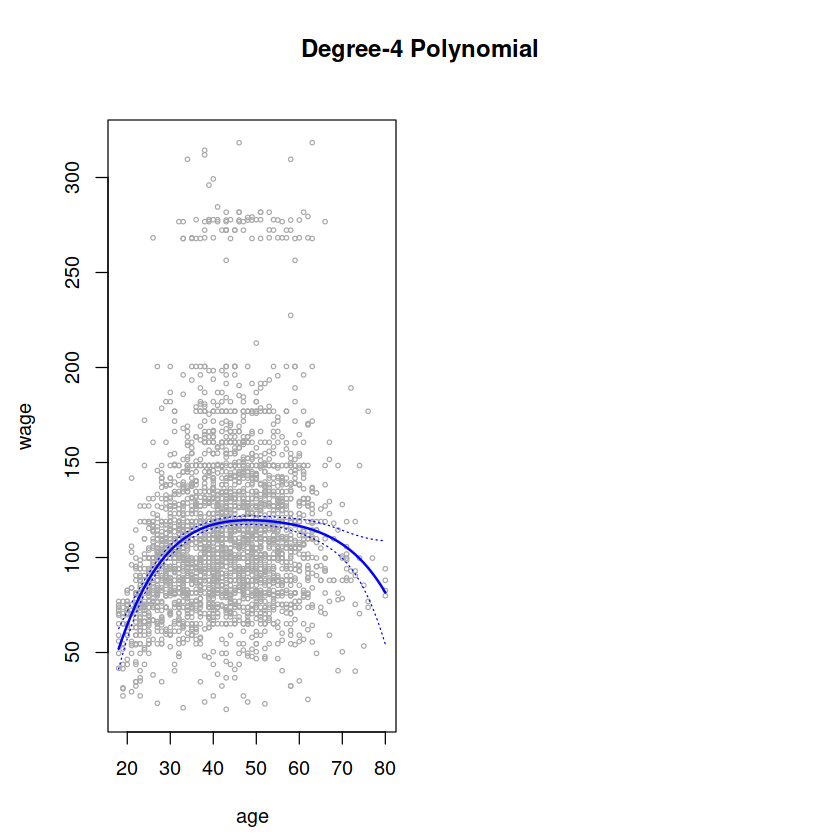

In [7]:
fit <- lm(wage ~ poly(age, 4), data = Wage)

agelims <- range(Wage$age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                  preds$fit - 2 * preds$se.fit)

par(mfrow = c(1, 2), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
with(Wage, plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey"))
title("Degree-4 Polynomial", outer = TRUE)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In [8]:
fit2 <- lm(wage ~ poly(age, 4, raw = TRUE), data = Wage)

preds2 <- predict(fit2, newdata = list(age = age.grid), se = TRUE)
max(abs(preds$fit - preds2$fit))

[1] 7.81597e-11

In [9]:
fit.1 <- lm(wage ~ age, data = Wage)
fit.2 <- lm(wage ~ poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ poly(age, 3), data = Wage)
fit.4 <- lm(wage ~ poly(age, 4), data = Wage)
fit.5 <- lm(wage ~ poly(age, 5), data = Wage)

print(anova(fit.1, fit.2, fit.3, fit.4, fit.5))

Analysis of Variance Table

Model 1: wage ~ age
Model 2: wage ~ poly(age, 2)
Model 3: wage ~ poly(age, 3)
Model 4: wage ~ poly(age, 4)
Model 5: wage ~ poly(age, 5)
  Res.Df     RSS Df Sum of Sq        F    Pr(>F)    
1   2998 5022216                                    
2   2997 4793430  1    228786 143.5931 < 2.2e-16 ***
3   2996 4777674  1     15756   9.8888  0.001679 ** 
4   2995 4771604  1      6070   3.8098  0.051046 .  
5   2994 4770322  1      1283   0.8050  0.369682    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [10]:
coef(summary(fit.5))

Estimate   Std. Error t value     Pr(>|t|)    
(Intercept)    111.70361  0.7287647 153.2780243 0.000000e+00
poly(age, 5)1  447.06785 39.9160847  11.2001930 1.491111e-28
poly(age, 5)2 -478.31581 39.9160847 -11.9830341 2.367734e-32
poly(age, 5)3  125.52169 39.9160847   3.1446392 1.679213e-03
poly(age, 5)4  -77.91118 39.9160847  -1.9518743 5.104623e-02
poly(age, 5)5  -35.81289 39.9160847  -0.8972045 3.696820e-01

In [11]:
fit.1 <- lm(wage ~ education + age, data = Wage)
fit.2 <- lm(wage ~ education + poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ education + poly(age, 3), data = Wage)
print(anova(fit.1, fit.2, fit.3))

Analysis of Variance Table

Model 1: wage ~ education + age
Model 2: wage ~ education + poly(age, 2)
Model 3: wage ~ education + poly(age, 3)
  Res.Df     RSS Df Sum of Sq        F Pr(>F)    
1   2994 3867992                                 
2   2993 3725395  1    142597 114.6969 <2e-16 ***
3   2992 3719809  1      5587   4.4936 0.0341 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [12]:
fit <- glm(I(wage > 250) ~ poly(age, 4), data = Wage,
           family = binomial)
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)

In [13]:
pfit <- exp(preds$fit) / (1 + exp(preds$fit))
se.bands.logit <- cbind(preds$fit + 2 * preds$se.fit,
                        preds$fit - 2 * preds$se.fit)
se.bands <- exp(se.bands.logit) / (1 + exp(se.bands.logit))

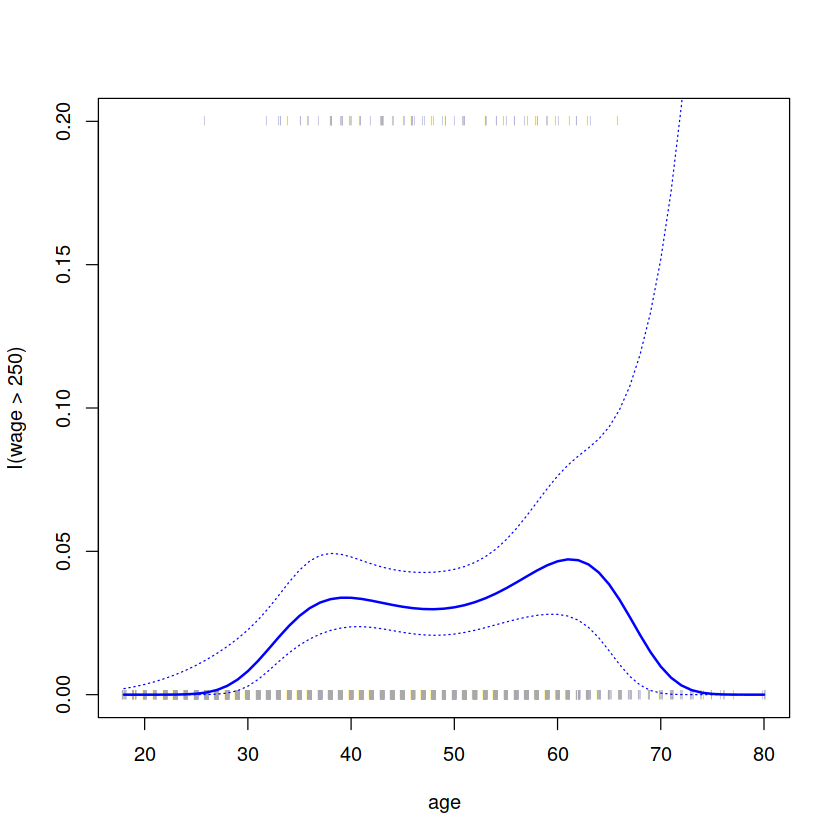

In [14]:
attach(Wage)
plot(age, I(wage > 250), xlim = agelims, type = "n", ylim = c(0, .2))
points(jitter(age), I((wage > 250) / 5), cex = 0.5, pch = "|",
       col = "darkgrey")
lines(age.grid, pfit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)
detach(Wage)

In [15]:
table(cut(Wage$age, 4))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

In [16]:
fit <- lm(wage ~ cut(age, 4), data = Wage)
coef(summary(fit))

Estimate  Std. Error t value   Pr(>|t|)    
(Intercept)            94.158392 1.476069   63.789970 0.000000e+00
cut(age, 4)(33.5,49]   24.053491 1.829431   13.148074 1.982315e-38
cut(age, 4)(49,64.5]   23.664559 2.067958   11.443444 1.040750e-29
cut(age, 4)(64.5,80.1]  7.640592 4.987424    1.531972 1.256350e-01

### Splines

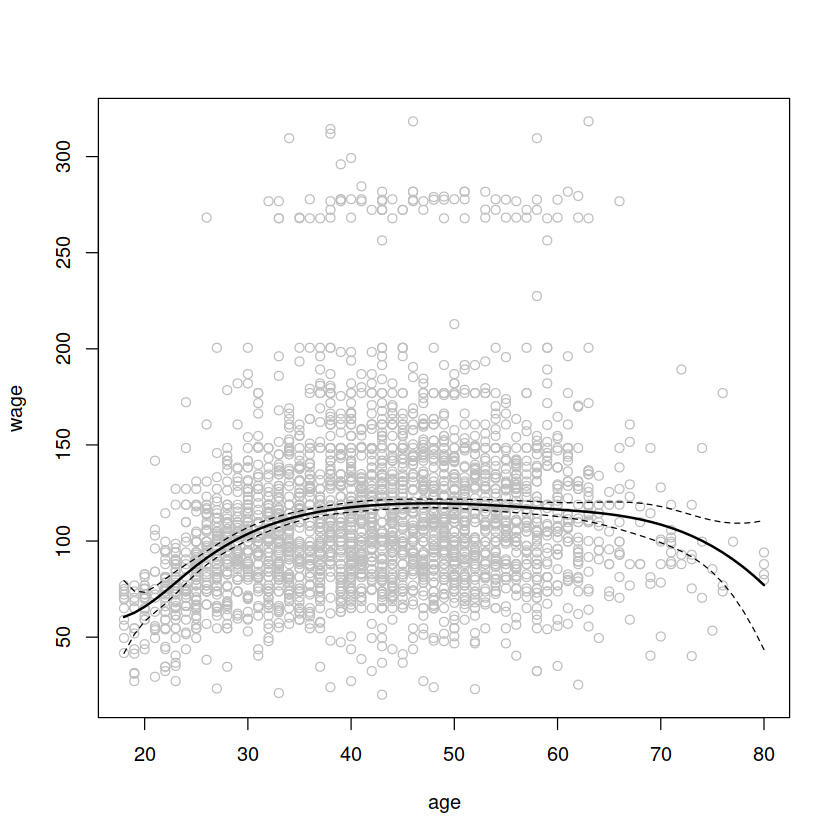

In [17]:
fit <- lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
pred <- predict(fit, newdata = list(age = age.grid), se = TRUE)
attach(Wage)
plot(age, wage, col = "gray")
lines(age.grid, pred$fit, lwd = 2)
lines(age.grid, pred$fit + 2*pred$se, lty = "dashed")
lines(age.grid, pred$fit - 2*pred$se, lty = "dashed")
detach(Wage)

In [18]:
dim(bs(Wage$age, knots = c(25, 40, 6)))

[1] 3000    6

In [19]:
dim(bs(Wage$age, df = 6))

[1] 3000    6

In [20]:
attr(bs(Wage$age, df = 6), "knots")

25%   50%   75% 
33.75 42.00 51.00

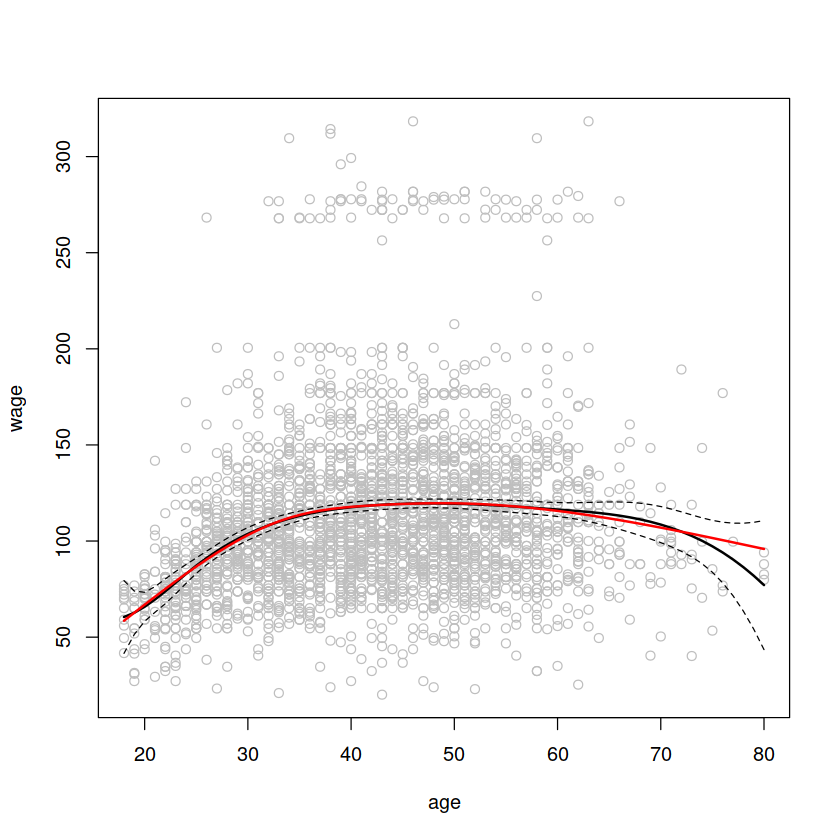

In [21]:
fit2 <- lm(wage ~ ns(age, df = 4), data = Wage)
pred2 <- predict(fit2, newdata = list(age = age.grid), se = TRUE)

attach(Wage)
plot(age, wage, col = "gray")
lines(age.grid, pred$fit, lwd = 2)
lines(age.grid, pred$fit + 2*pred$se, lty = "dashed")
lines(age.grid, pred$fit - 2*pred$se, lty = "dashed")
lines(age.grid, pred2$fit, col = "red", lwd = 2)
detach(Wage)

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

[1] 6.794596

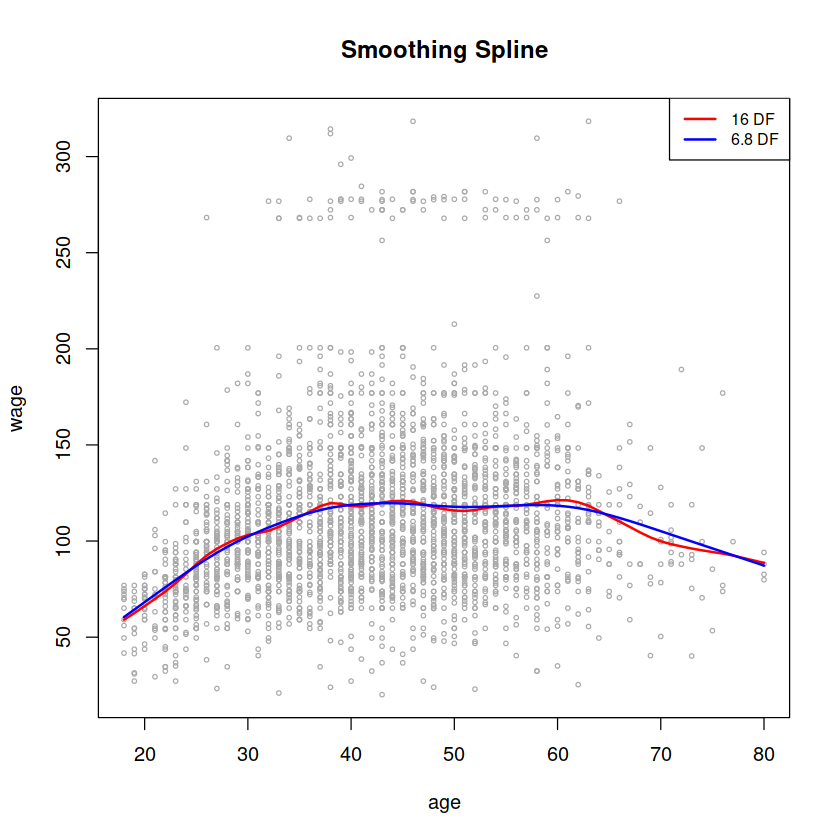

In [22]:
attach(Wage)
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Smoothing Spline")
fit <- smooth.spline(age, wage, df = 16)
fit2 <- smooth.spline(age, wage, cv = TRUE)
lines(fit, col = "red", lwd = 2)
lines(fit2, col = "blue", lwd = 2)
legend("topright", legend = c("16 DF", "6.8 DF"), 
       col = c("red", "blue"), lty = 1, lwd = 2, cex = .8)
fit2$df
detach(Wage)

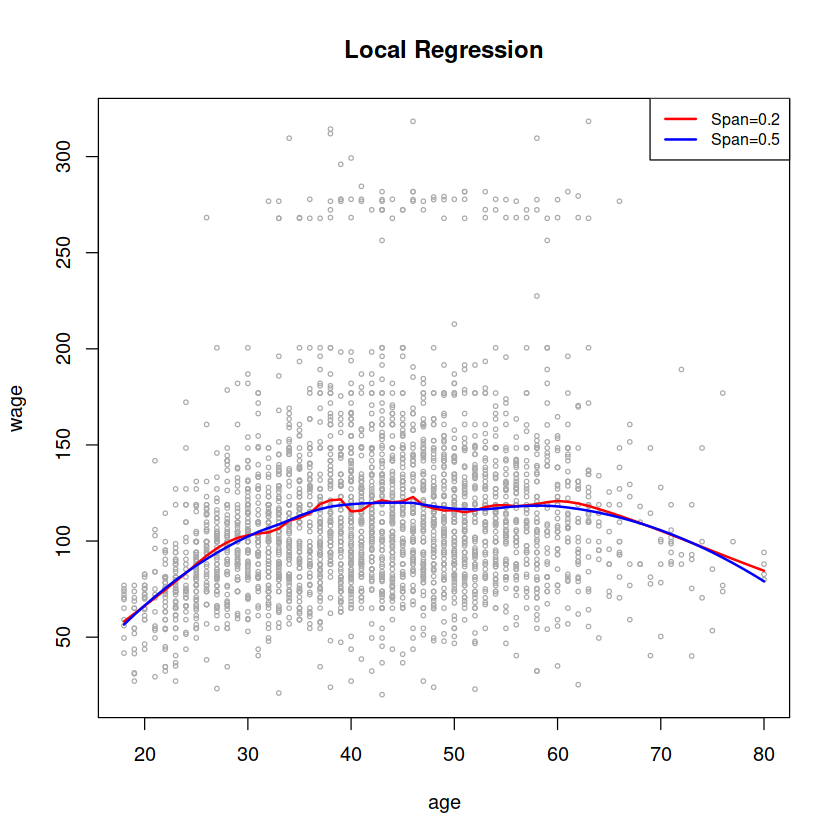

In [23]:
attach(Wage)
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Local Regression")
fit <- loess(wage ~ age, span = .2, data = Wage)
fit2 <- loess(wage ~ age, span = .5, data = Wage)
lines(age.grid, predict(fit, data.frame(age = age.grid)),
      col = "red", lwd = 2)
lines(age.grid, predict(fit2, data.frame(age = age.grid)),
      col = "blue", lwd = 2)
legend("topright", legend = c("Span=0.2", "Span=0.5"),
       col = c("red", "blue"), lty = 1, lwd = 2, cex = .8)
detach(Wage)

### GAM

In [24]:
gam1 <- lm(wage ~ ns(year, 4) + ns(age, 5) + education, data = Wage)
summary(gam1)


Call:
lm(formula = wage ~ ns(year, 4) + ns(age, 5) + education, data = Wage)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.513  -19.608   -3.583   14.112  214.535 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   46.949      4.704   9.980  < 2e-16 ***
ns(year, 4)1                   8.625      3.466   2.488  0.01289 *  
ns(year, 4)2                   3.762      2.959   1.271  0.20369    
ns(year, 4)3                   8.127      4.211   1.930  0.05375 .  
ns(year, 4)4                   6.806      2.397   2.840  0.00455 ** 
ns(age, 5)1                   45.170      4.193  10.771  < 2e-16 ***
ns(age, 5)2                   38.450      5.076   7.575 4.78e-14 ***
ns(age, 5)3                   34.239      4.383   7.813 7.69e-15 ***
ns(age, 5)4                   48.678     10.572   4.605 4.31e-06 ***
ns(age, 5)5                    6.557      8.367   0.784  0.43328    
education2. HS Grad           10.983      2.

In [25]:
gam.m3 <- gam(wage ~ s(year, 4) + s(age, 5) + education,
              data = Wage)
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
---

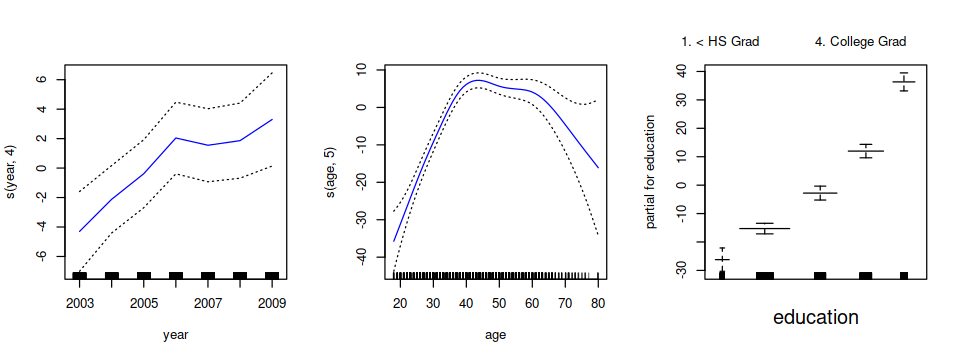

In [26]:
options(repr.plot.height = 3, repr.plot.width = 8)
par(mfrow = c(1, 3))
plot(gam.m3, se = TRUE, col = "blue")

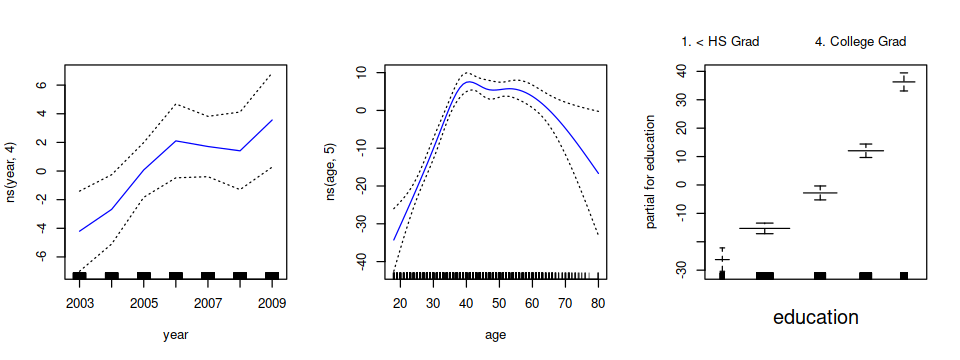

In [27]:
options(repr.plot.height = 3, repr.plot.width = 8)
par(mfrow = c(1, 3))
plot.Gam(gam1, se = TRUE, col = "blue")

In [28]:
gam.m1 <- gam(wage ~ s(age, 5) + education, data = Wage)
gam.m2 <- gam(wage ~ year + s(age, 5) + education, data = Wage)
gam.m3 <- gam(wage ~ s(year, 4) + s(age, 5) + education,
              data = Wage)
print(anova(gam.m1, gam.m2, gam.m3, test = "F"))

Analysis of Deviance Table

Model 1: wage ~ s(age, 5) + education
Model 2: wage ~ year + s(age, 5) + education
Model 3: wage ~ s(year, 4) + s(age, 5) + education
  Resid. Df Resid. Dev Df Deviance       F    Pr(>F)    
1      2990    3711731                                  
2      2989    3693842  1  17889.2 14.4771 0.0001447 ***
3      2986    3689770  3   4071.1  1.0982 0.3485661    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [29]:
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
---

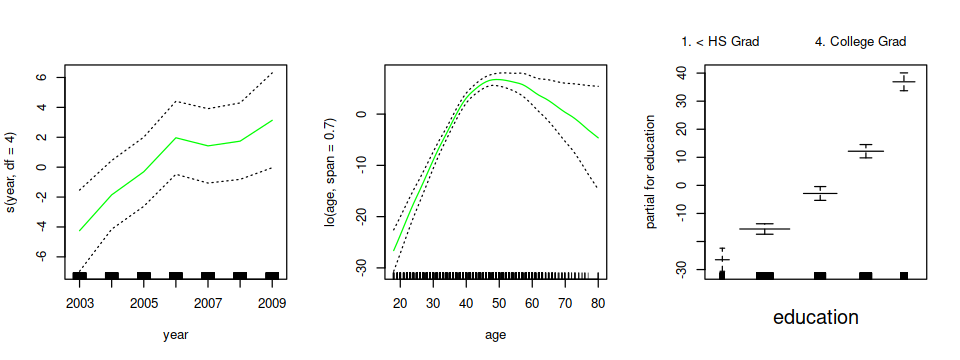

In [30]:
preds <- predict(gam.m2, newdata = Wage)
gam.lo <- gam(wage ~ s(year, df = 4) + lo(age, span = 0.7) +
              education, data = Wage)
options(repr.plot.height = 3, repr.plot.width = 8)
par(mfrow = c(1, 3))
plot.Gam(gam.lo, se = TRUE, col = "green")

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”

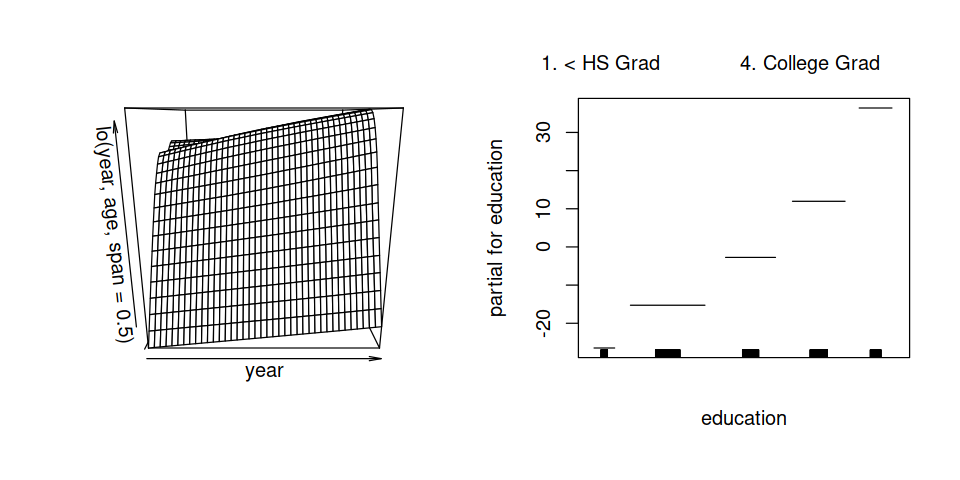

In [31]:
gam.lo.i <- gam(wage ~ lo(year, age, span = 0.5) + education, 
                data = Wage)
options(repr.plot.height = 4, repr.plot.width = 8)
par(mfrow = c(1, 2))
plot(gam.lo.i)

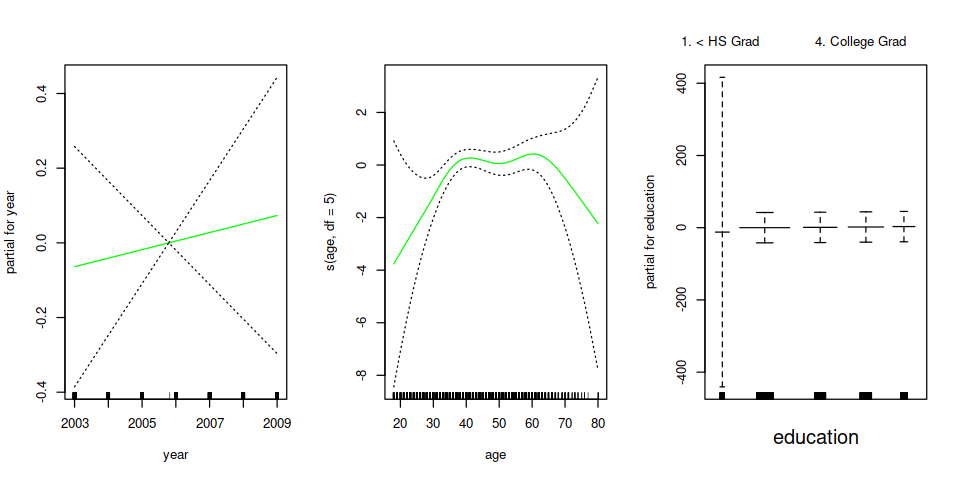

In [32]:
gam.lr <- gam(I(wage > 250) ~ year + s(age, df = 5) + education,
              family = binomial, data = Wage)
par(mfrow = c(1, 3))
plot(gam.lr, se = TRUE, col = "green")

In [33]:
with(Wage, table(education, I(wage > 250)))

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

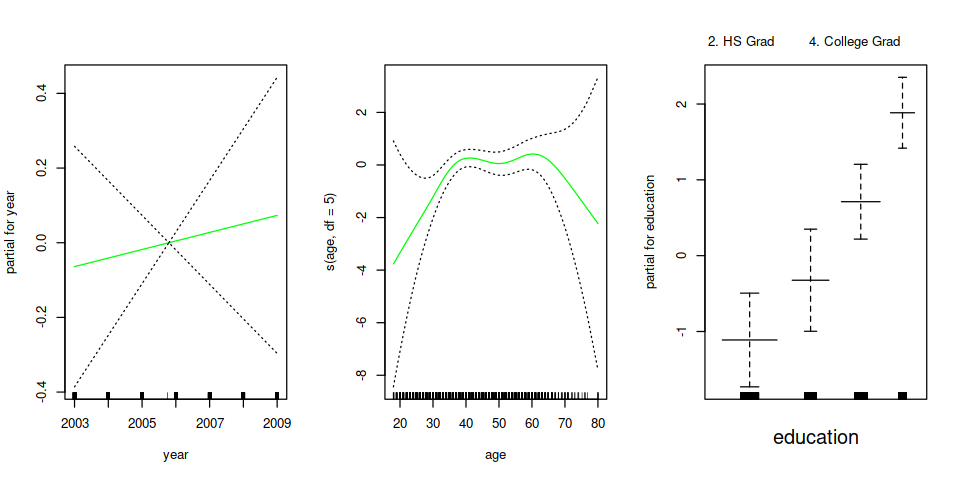

In [34]:
gam.lr.s <- gam(I(wage > 250) ~ year + s(age, df = 5) + education,
                family = binomial, data = Wage,
                subset = (education != "1. < HS Grad"))
par(mfrow = c(1, 3))
plot(gam.lr.s, se = TRUE, col = "green")

## Applied

### Exercise 6

Continuing on **Wage** data set.

a) Polynomial regression to predict **wage** using **age**. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA?

I will perform a 10-fold cross-validation to select the best degree.

In [35]:
crossval <- function(degree, data, folds) {
    foreach(k = unique(folds), .combine = "c") %do% {
        train <- folds != k
        fit <- lm(wage ~ poly(age, degree), data = data,
                  subset = train)
        pred <- predict(fit, data[!train, ])
        mean((pred - data[!train, ]$wage)^2)
    }
}

find.degree <- function(data, folds) {
    foreach(d = 1:10, .combine = "rbind") %do% {
        mse <- crossval(d, data, folds)
        avg.mse <- mean(mse)
        se.mse <- sd(mse) / sqrt(length(unique(folds)))
        data.frame(
            degree = d,
            min = avg.mse - 1.96*se.mse,
            max = avg.mse + 1.96*se.mse,
            avg = avg.mse
        )
    }
}

set.seed(1)
folds <- sample(10, nrow(Wage), replace = TRUE)
result <- find.degree(Wage, folds)

In [36]:
result

degree min      max      avg     
1   1     1528.774 1826.746 1677.760
2   2     1456.414 1744.661 1600.537
3   3     1452.385 1741.637 1597.011
4   4     1450.970 1740.502 1595.736
5   5     1452.539 1741.217 1596.878
6   6     1451.929 1740.076 1596.003
7   7     1452.347 1738.800 1595.574
8   8     1452.814 1740.296 1596.555
9   9     1450.865 1738.829 1594.847
10 10     1451.364 1739.965 1595.664

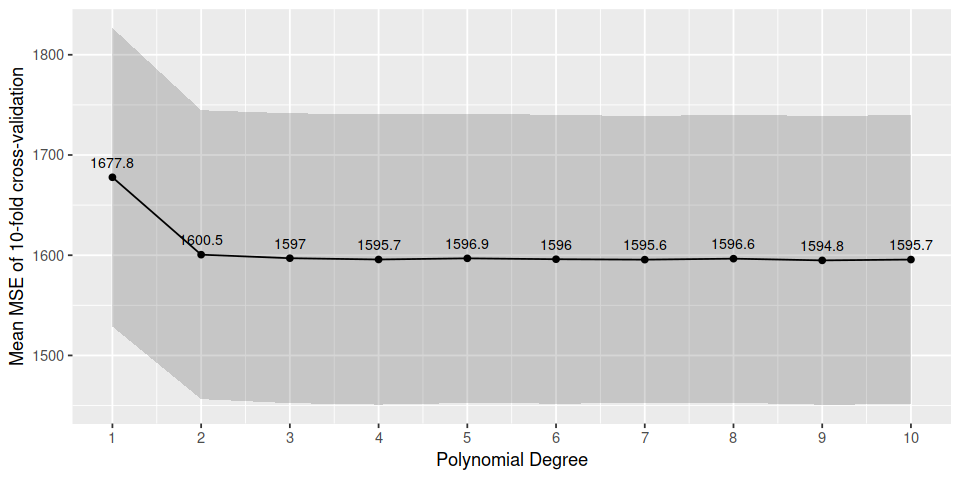

In [37]:
ggplot(result, aes(degree, avg)) +
    geom_ribbon(aes(ymin = min, ymax = max), alpha = 0.2) +
    geom_line() +
    geom_point() +
    geom_text(aes(label = round(avg, 1)),
              size = 3, nudge_y = 15) +
    scale_x_continuous(breaks = seq(1, 10)) +
    xlab("Polynomial Degree") +
    ylab("Mean MSE of 10-fold cross-validation")

In [38]:
which.min(result$avg)

[1] 9

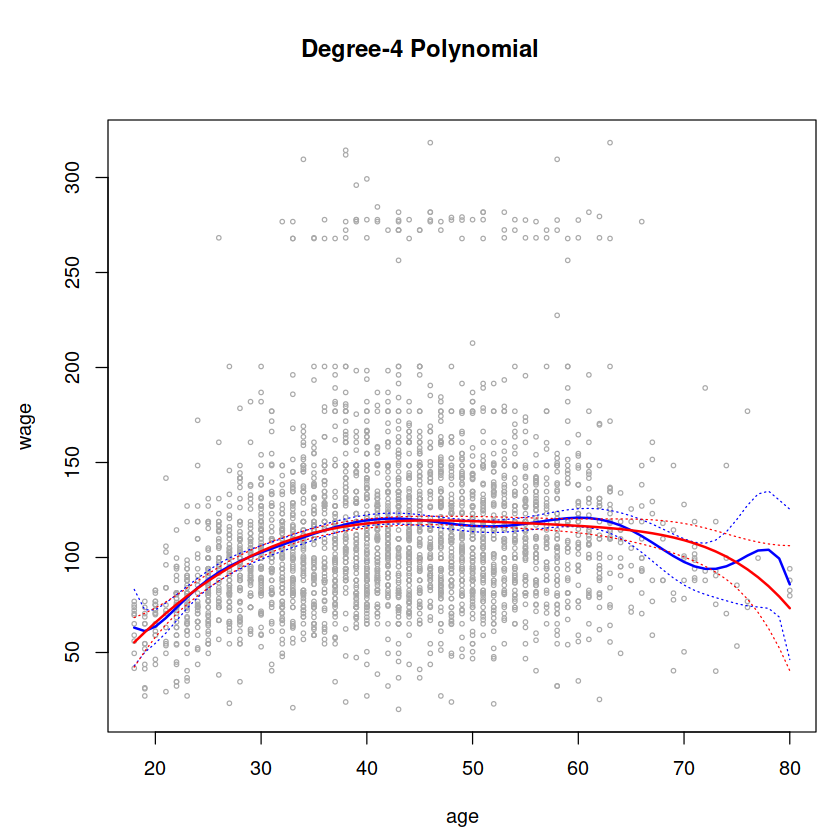

In [39]:
fit <- lm(wage ~ poly(age, 9), data = Wage)
fit.anova <- lm(wage ~ poly(age, 5), data = Wage)

agelims <- range(Wage$age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                  preds$fit - 2 * preds$se.fit)
options(repr.plot.height = 7, repr.plot.width = 7)
par(mfrow = c(1, 1), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
with(Wage, plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey"))
title("Degree-4 Polynomial", outer = TRUE)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

preds <- predict(fit.anova, newdata = list(age = age.grid),
                 se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                  preds$fit - 2 * preds$se.fit)
lines(age.grid, preds$fit, lwd = 2, col = "red")
matlines(age.grid, se.bands, lwd = 1, col = "red", lty = 3)

The optimal degree with cross-validation was up to $age^9$ whereas with ANOVA was up to $age^5$. Looking at the resulting polynomial fit on the above plot I think the model selected with ANOVA is better than the model chosen with the cross-validation. The later seems to flexible, and it might be overfitting the cross-validation.

However, at looking how the curves decrease on the cross-validation plot, we see that with up to $age^4$ the mean MSE decreases, but then it seems to stabilize. Thus, we may as well try with it.

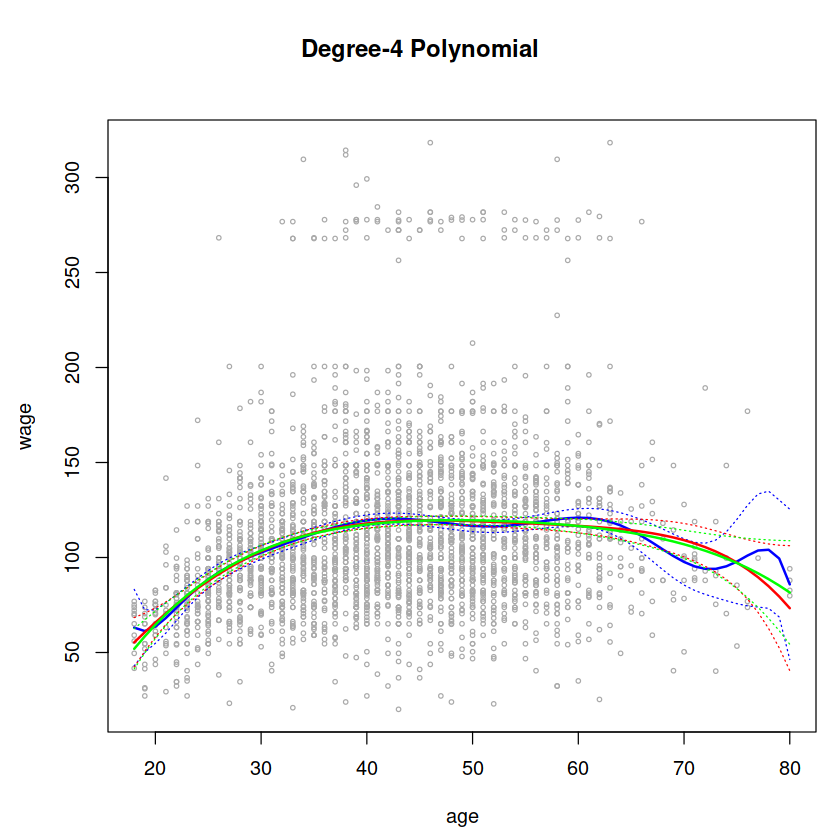

In [40]:
fit <- lm(wage ~ poly(age, 9), data = Wage)
fit2 <- lm(wage ~ poly(age, 4), data = Wage)
fit.anova <- lm(wage ~ poly(age, 5), data = Wage)

agelims <- range(Wage$age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                  preds$fit - 2 * preds$se.fit)
options(repr.plot.height = 7, repr.plot.width = 7)
par(mfrow = c(1, 1), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
with(Wage, plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey"))
title("Degree-4 Polynomial", outer = TRUE)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

preds <- predict(fit.anova, newdata = list(age = age.grid),
                 se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                  preds$fit - 2 * preds$se.fit)
lines(age.grid, preds$fit, lwd = 2, col = "red")
matlines(age.grid, se.bands, lwd = 1, col = "red", lty = 3)

preds <- predict(fit2, newdata = list(age = age.grid),
                 se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                  preds$fit - 2 * preds$se.fit)
lines(age.grid, preds$fit, lwd = 2, col = "green")
matlines(age.grid, se.bands, lwd = 1, col = "green", lty = 3)

The model with $age^4$ chosen by examining the MSE curve (instead of simply getting the lower average) results in a better model than the one chosen with ANOVA.

b) Fit a step function to predict **wage** using **age** and  perform cross-validation to choose the optimal number of cuts. Makes a plot of the fit obtained.

In [41]:
crossval <- function(degree, data, folds) {
    foreach(k = unique(folds), .combine = "c") %do% {
        train <- folds != k
        datacp <- data
        datacp$age <- factor(cut(datacp$age, degree))
        fit <- lm(wage ~ age, data = datacp,
                  subset = train)
        pred <- predict(fit, datacp[!train, ])
        mean((pred - data[!train, ]$wage)^2)
    }
}

find.degree <- function(data, folds) {
    foreach(d = 2:10, .combine = "rbind") %do% {
        mse <- crossval(d, data, folds)
        avg.mse <- mean(mse)
        se.mse <- sd(mse) / sqrt(length(unique(folds)))
        data.frame(
            degree = d,
            min = avg.mse - 1.96*se.mse,
            max = avg.mse + 1.96*se.mse,
            avg = avg.mse
        )
    }
}

set.seed(1)
folds <- sample(10, nrow(Wage), replace = TRUE)
result <- find.degree(Wage, folds)

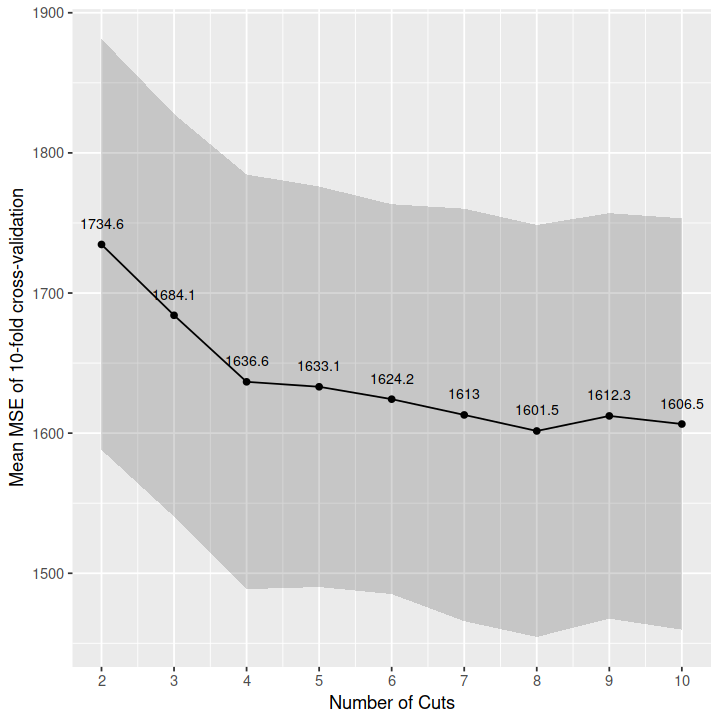

In [42]:
options(repr.plot.height = 6, repr.plot.width = 6)
ggplot(result, aes(degree, avg)) +
    geom_ribbon(aes(ymin = min, ymax = max), alpha = 0.2) +
    geom_line() +
    geom_point() +
    geom_text(aes(label = round(avg, 1)),
              size = 3, nudge_y = 15) +
    scale_x_continuous(breaks = seq(1, 10)) +
    xlab("Number of Cuts") +
    ylab("Mean MSE of 10-fold cross-validation")

The optimal number of cuts is 8.

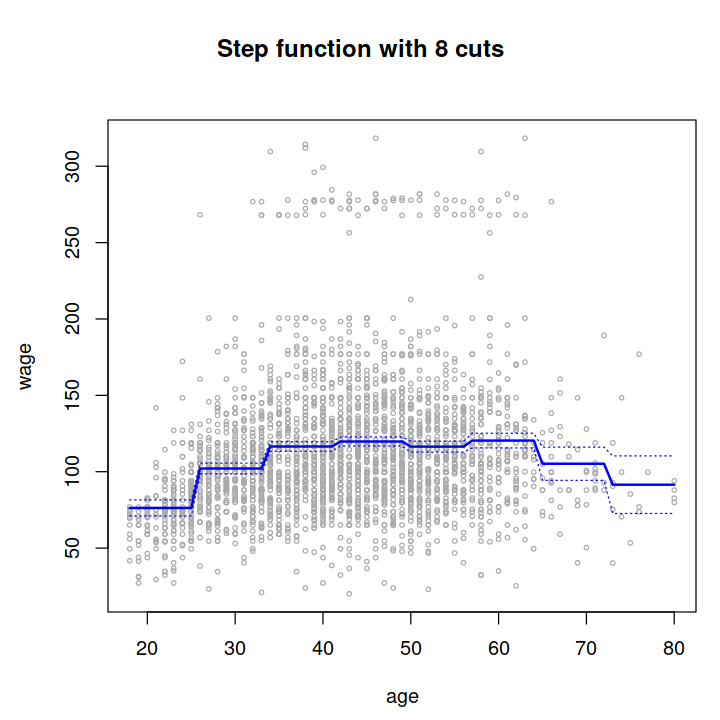

In [43]:
fit <- lm(wage ~ cut(age, 8), data = Wage)

agelims <- range(Wage$age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                  preds$fit - 2 * preds$se.fit)
options(repr.plot.height = 6, repr.plot.width = 6)
par(mfrow = c(1, 1), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
with(Wage, plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey"))
title("Step function with 8 cuts", outer = TRUE)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

### Exercise 7

Explore marital status **maritl**, job class **jobclass**, and others with **wage**, and use non-linear fitting techniques in order to fit flexible models to the data. Create plots of the results obtained, and write a summary of your findings.

Let’s just make a plot for age to use it as template for the other variables.

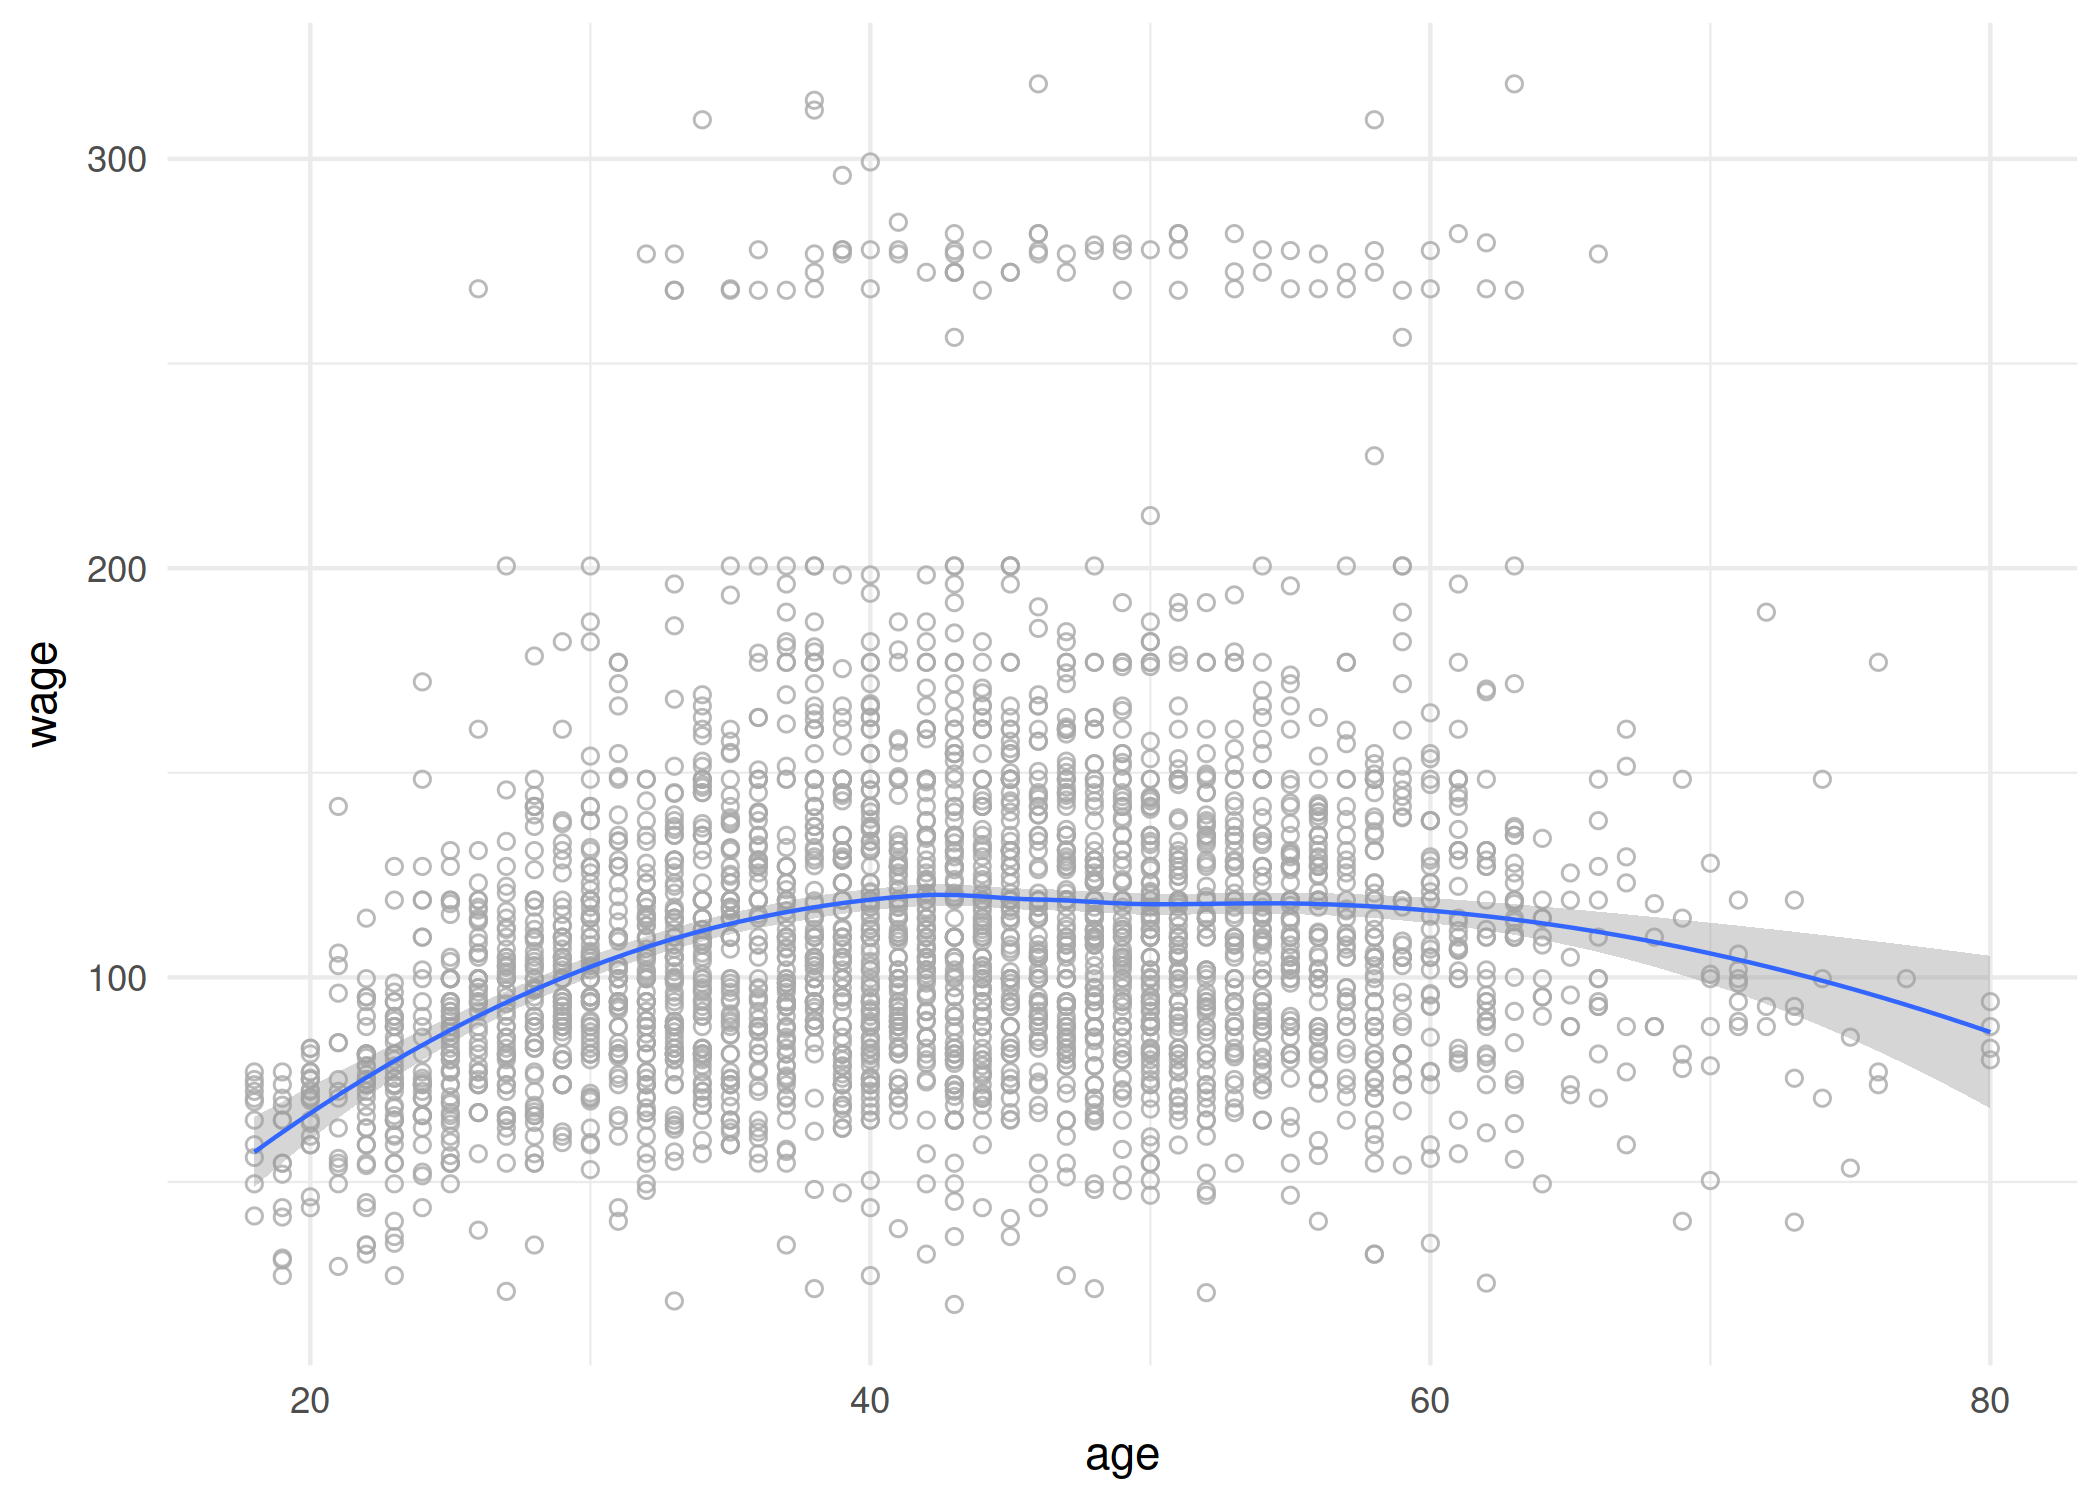

In [44]:
options(repr.plot.height = 5, repr.plot.width = 7,
        repr.plot.res = 300)
ggplot(Wage, aes(age, wage)) +
    geom_point(shape = 1, alpha = 0.8, colour = "darkgrey") +
    geom_smooth(method = "loess", size = 0.5) +
    theme_minimal()

#### Marital status

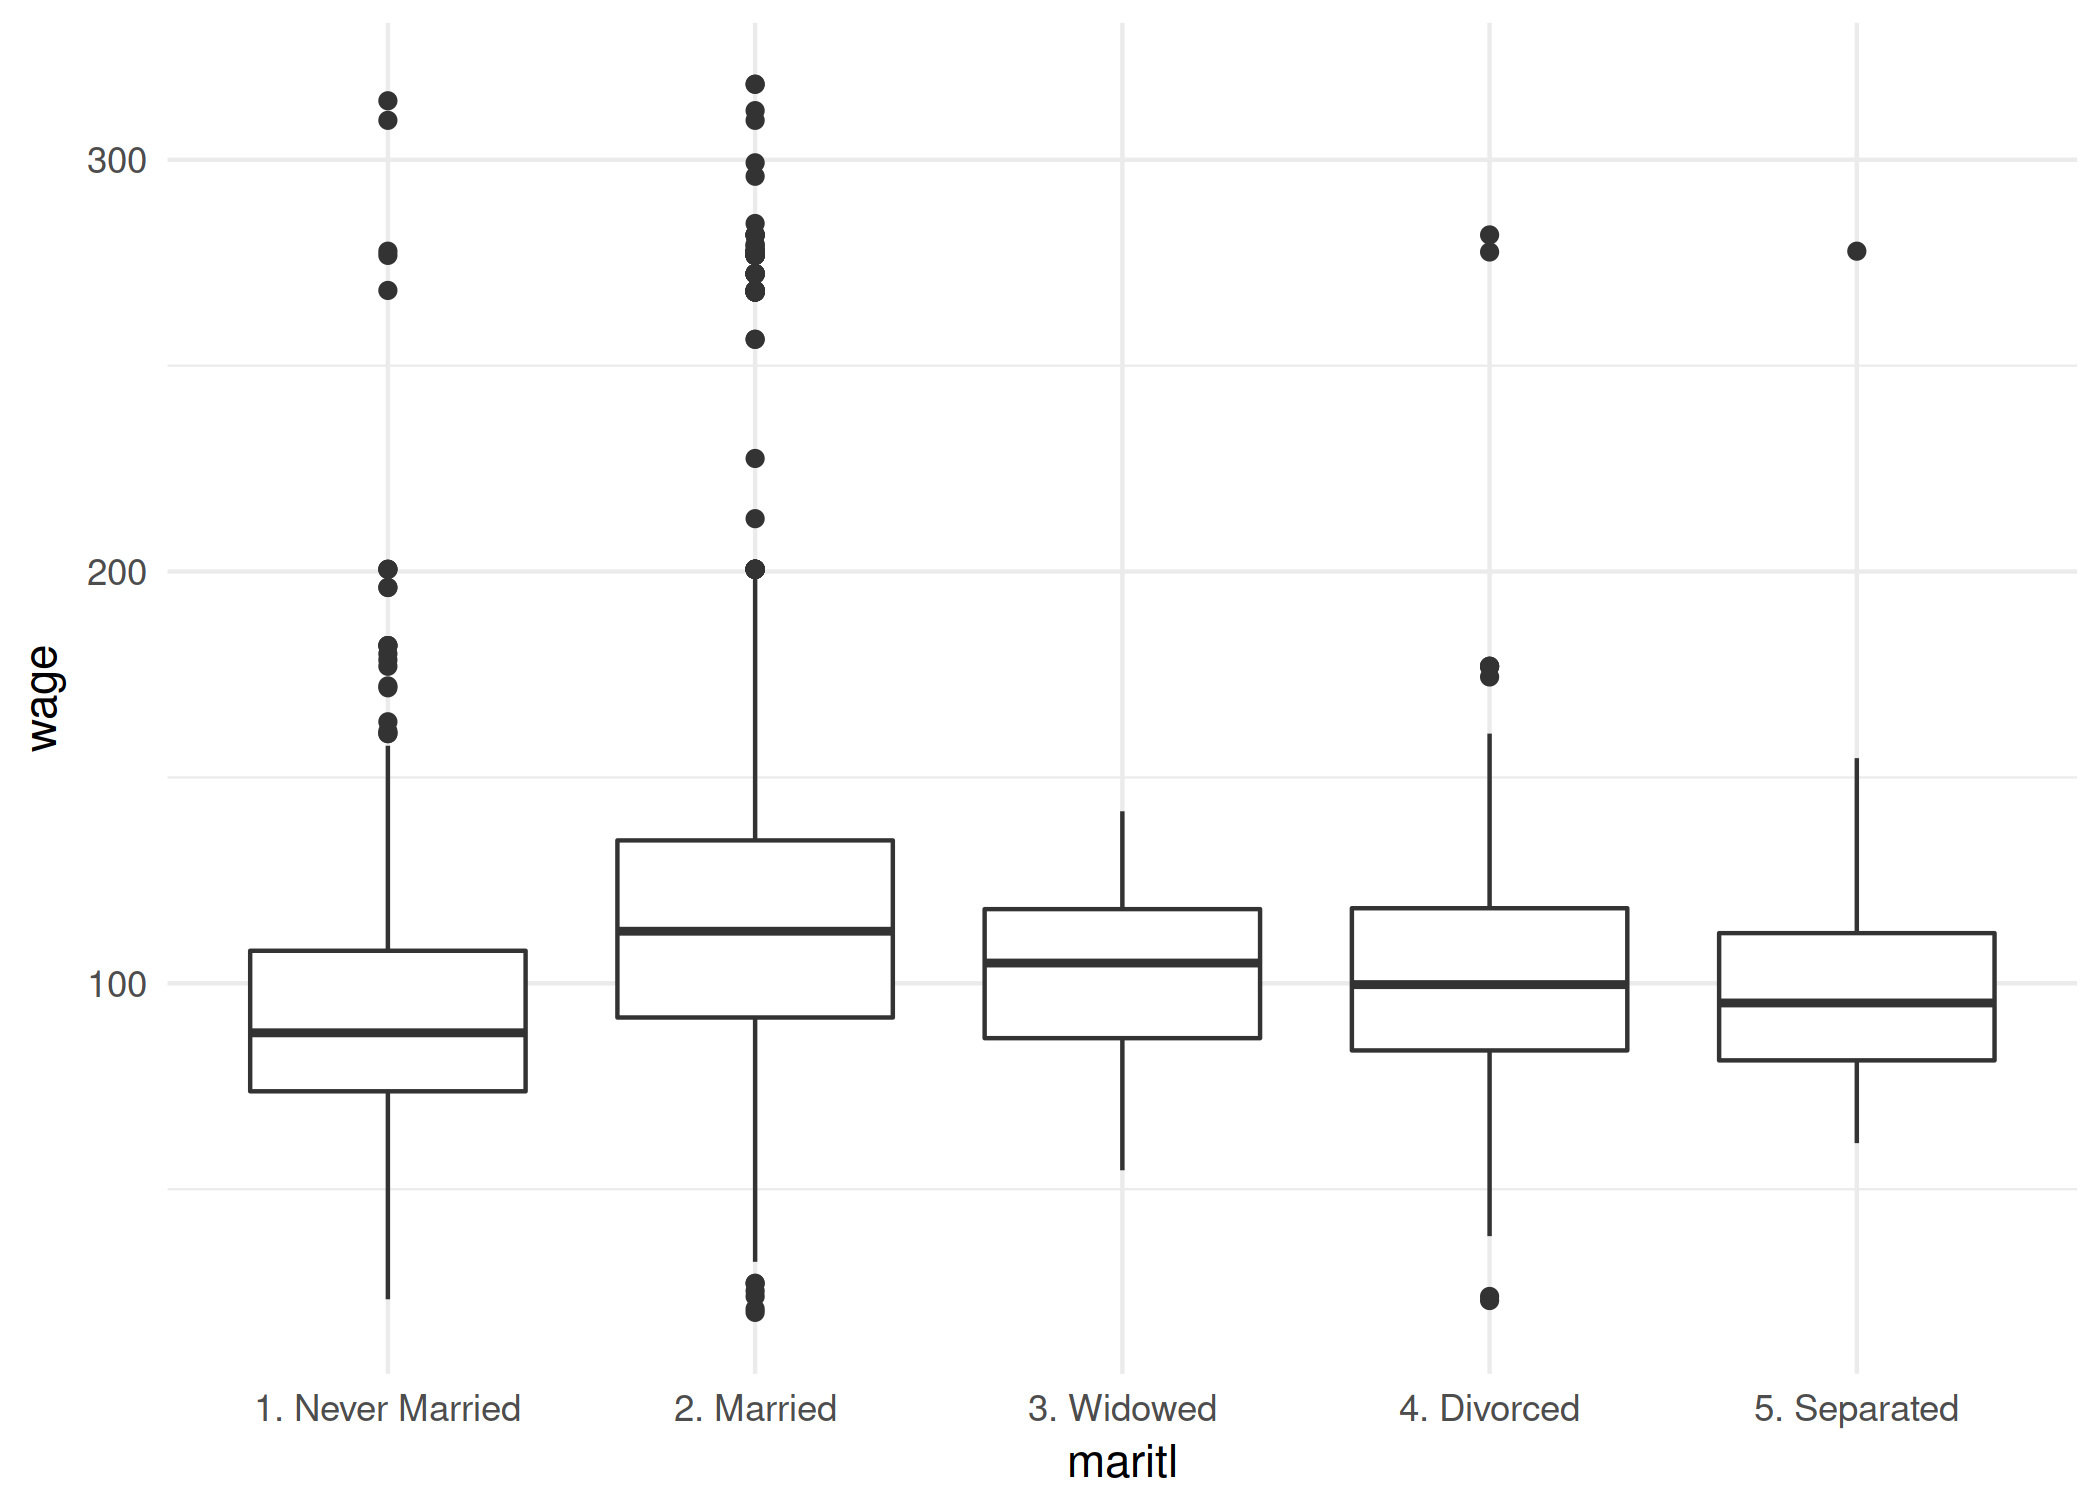

In [45]:
options(repr.plot.height = 5, repr.plot.width = 7,
        repr.plot.res = 300)
ggplot(Wage, aes(maritl, wage)) +
    geom_boxplot() +
    theme_minimal()

Marital status is a categorical variable, so why so I use a non-linear fitting techniques with it?

#### Job class

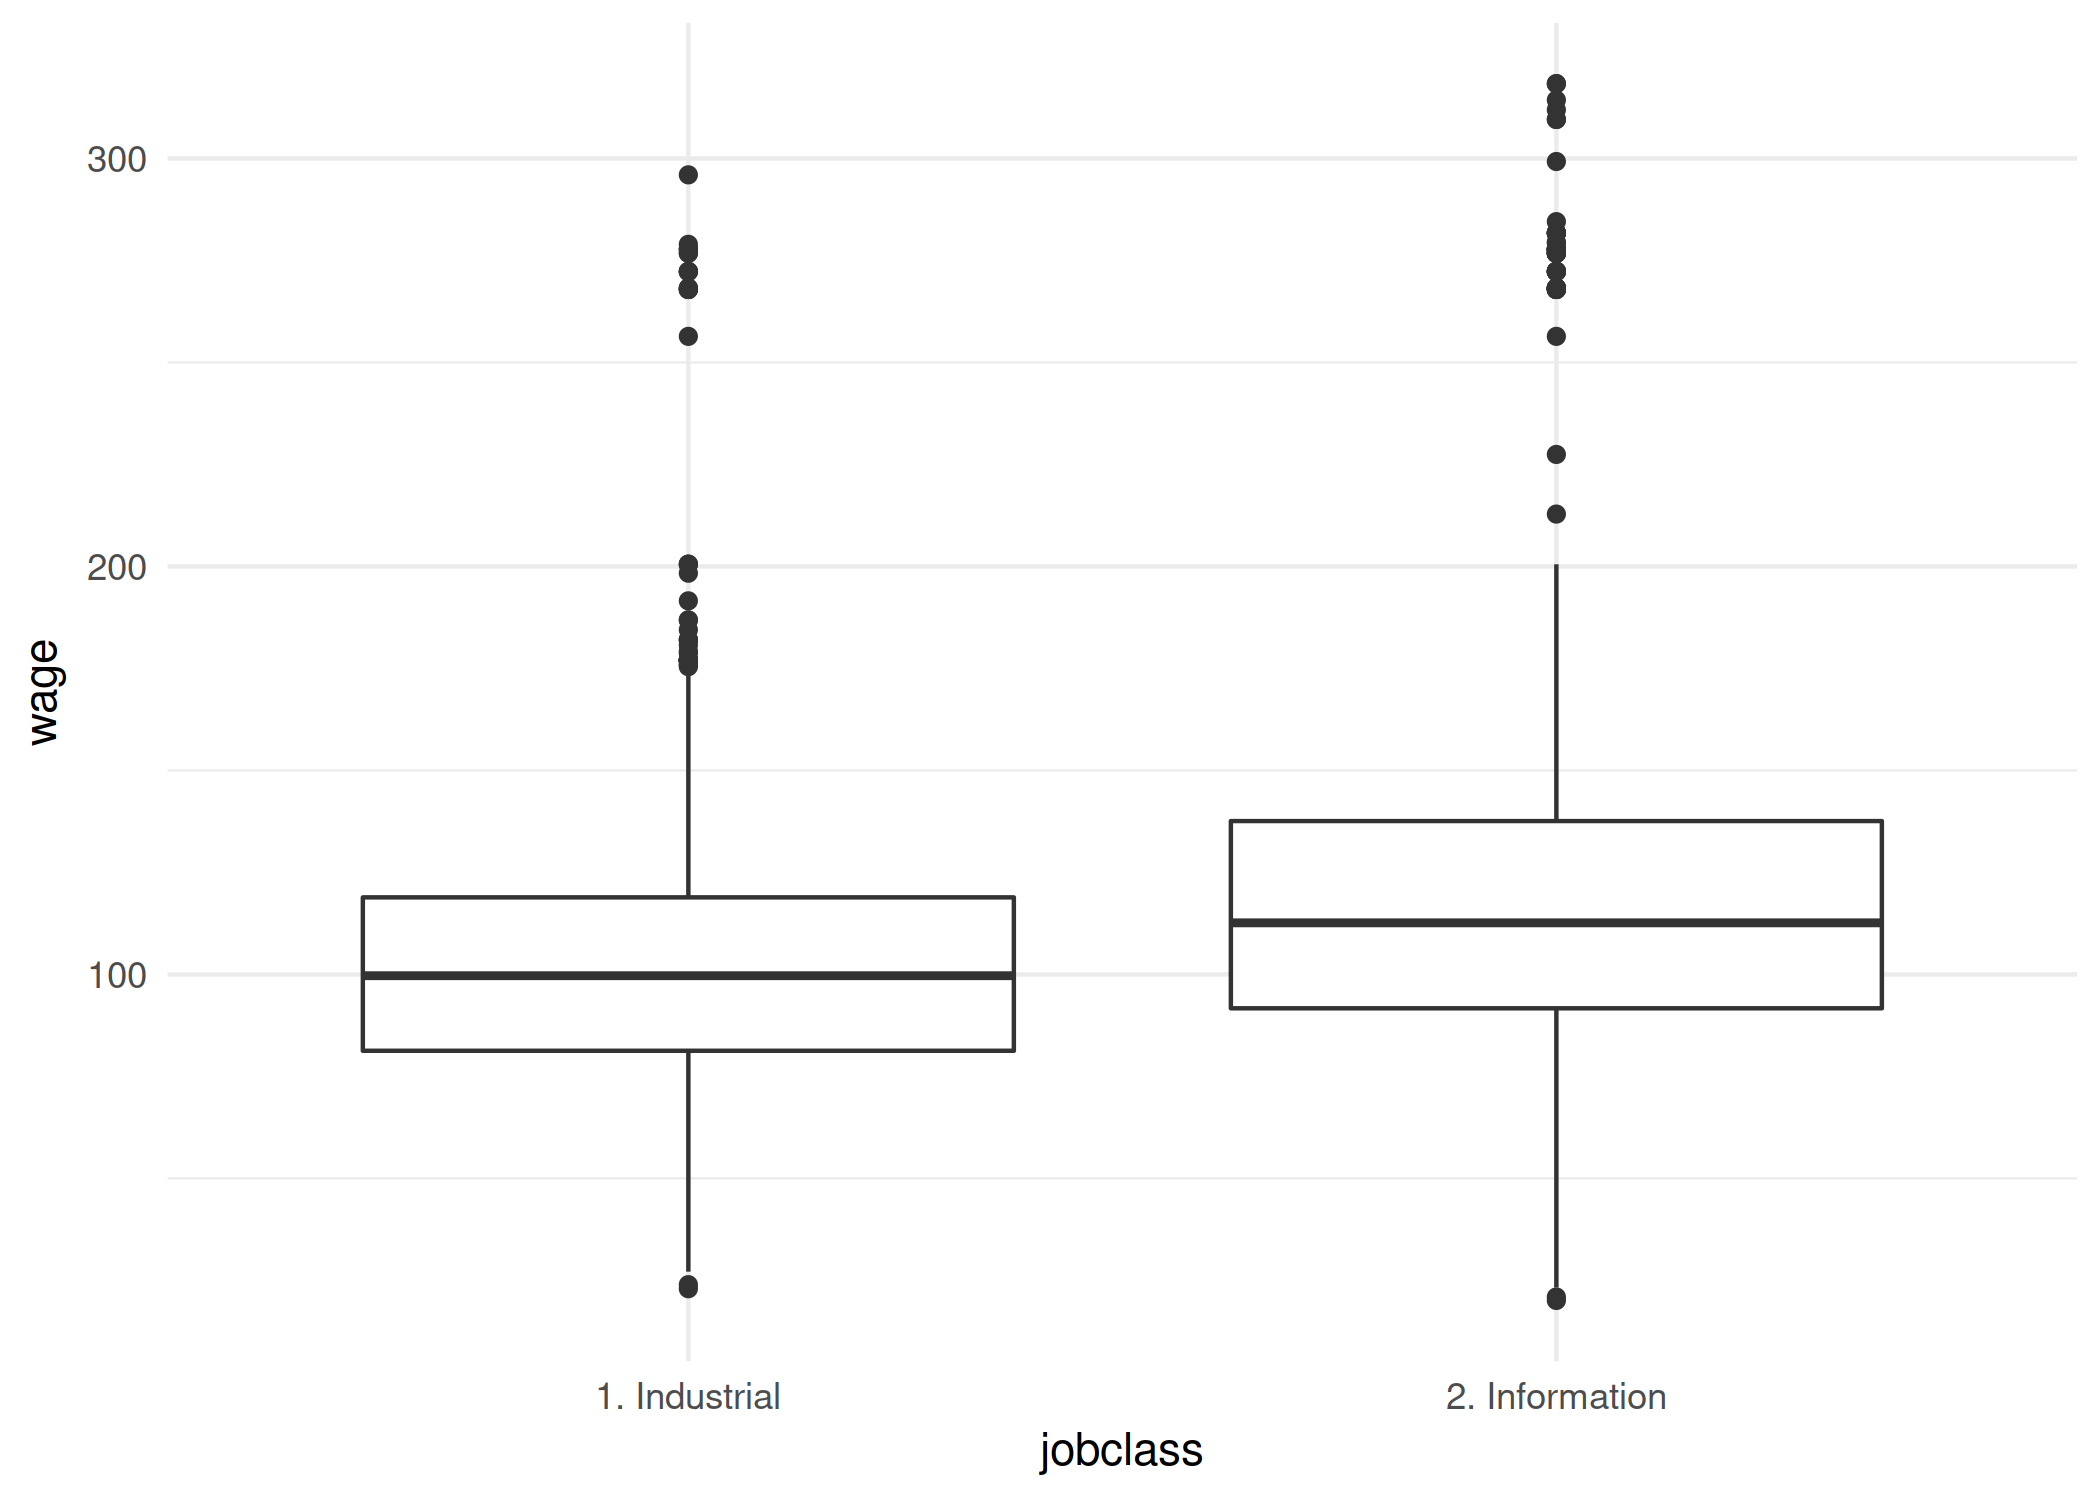

In [46]:
options(repr.plot.height = 5, repr.plot.width = 7,
        repr.plot.res = 300)
ggplot(Wage, aes(jobclass, wage)) +
    geom_boxplot() +
    theme_minimal()

Same of the job class: it’s a categorical variable. I guess the problem is to fit other variables along with these categorical ones.

In [47]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

In [48]:
set.seed(1)
train <- sample(nrow(Wage), nrow(Wage) / 2)

fit <- lm(wage ~ year + poly(age, 4) + education,
          data = Wage, subset = train)
pred <- predict(fit, Wage[-train, ])
lab.mse <- mean((pred - Wage$wage[-train])^2)
lab.mse

[1] 1176.184

In [49]:
set.seed(1)
train <- sample(nrow(Wage), nrow(Wage) / 2)

fit <- lm(wage ~ year + poly(age, 4) + education + 
          maritl + jobclass + health,
          data = Wage, subset = train)
pred <- predict(fit, Wage[-train, ])
lab.mse <- mean((pred - Wage$wage[-train])^2)
lab.mse

[1] 1133.877

In [50]:
summary(fit)


Call:
lm(formula = wage ~ year + poly(age, 4) + education + maritl + 
    jobclass + health, data = Wage, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-108.08  -19.53   -3.45   14.23  208.56 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2221.8423   912.3270  -2.435 0.014994 *  
year                            1.1441     0.4547   2.516 0.011970 *  
poly(age, 4)1                 323.3347    59.3169   5.451 5.86e-08 ***
poly(age, 4)2                -322.6004    53.4244  -6.038 1.96e-09 ***
poly(age, 4)3                  16.1365    51.3557   0.314 0.753405    
poly(age, 4)4                  38.4229    50.9444   0.754 0.450842    
education2. HS Grad             8.3867     3.4916   2.402 0.016428 *  
education3. Some College       20.2488     3.6808   5.501 4.44e-08 ***
education4. College Grad       34.7324     3.7512   9.259  < 2e-16 ***
education5. Advanced Degree    52.8080     4.1329  12.777 

The new variables are relevant to predict **wage**.

### Exercise 8

Fit some of the non-linear models investigates in this chapter to the **Auto** data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.

In [51]:
head(Auto)

mpg cylinders displacement horsepower weight acceleration year origin
1 18  8         307          130        3504   12.0         70   1     
2 15  8         350          165        3693   11.5         70   1     
3 18  8         318          150        3436   11.0         70   1     
4 16  8         304          150        3433   12.0         70   1     
5 17  8         302          140        3449   10.5         70   1     
6 15  8         429          198        4341   10.0         70   1     
  name                     
1 chevrolet chevelle malibu
2 buick skylark 320        
3 plymouth satellite       
4 amc rebel sst            
5 ford torino              
6 ford galaxie 500

#### Polynomial Features

In [52]:
fit <- lm(mpg ~ poly(horsepower, 5), data = Auto)
summary(fit)


Call:
lm(formula = mpg ~ poly(horsepower, 5), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4326  -2.5285  -0.2925   2.1750  15.9730 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.4459     0.2185 107.308  < 2e-16 ***
poly(horsepower, 5)1 -120.1377     4.3259 -27.772  < 2e-16 ***
poly(horsepower, 5)2   44.0895     4.3259  10.192  < 2e-16 ***
poly(horsepower, 5)3   -3.9488     4.3259  -0.913  0.36190    
poly(horsepower, 5)4   -5.1878     4.3259  -1.199  0.23117    
poly(horsepower, 5)5   13.2722     4.3259   3.068  0.00231 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.326 on 386 degrees of freedom
Multiple R-squared:  0.6967,	Adjusted R-squared:  0.6928 
F-statistic: 177.4 on 5 and 386 DF,  p-value: < 2.2e-16


In [53]:
fit <- lm(mpg ~ poly(cylinders, 4), data = Auto)
summary(fit)


Call:
lm(formula = mpg ~ poly(cylinders, 4), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2839  -2.9037  -0.9631   2.3437  18.0265 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           23.4459     0.2373  98.792  < 2e-16 ***
poly(cylinders, 4)1 -120.0128     4.6988 -25.541  < 2e-16 ***
poly(cylinders, 4)2    8.1131     4.6988   1.727    0.085 .  
poly(cylinders, 4)3   28.3793     4.6988   6.040 3.63e-09 ***
poly(cylinders, 4)4    0.4656     4.6988   0.099    0.921    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.699 on 387 degrees of freedom
Multiple R-squared:  0.6413,	Adjusted R-squared:  0.6376 
F-statistic:   173 on 4 and 387 DF,  p-value: < 2.2e-16


In [54]:
fit <- lm(mpg ~ poly(weight, 4), data = Auto)
summary(fit)


Call:
lm(formula = mpg ~ poly(weight, 4), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7233  -2.7179  -0.4254   1.9112  16.1935 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        23.4459     0.2114 110.930  < 2e-16 ***
poly(weight, 4)1 -128.4436     4.1847 -30.694  < 2e-16 ***
poly(weight, 4)2   23.1589     4.1847   5.534 5.77e-08 ***
poly(weight, 4)3    0.2204     4.1847   0.053    0.958    
poly(weight, 4)4   -2.8079     4.1847  -0.671    0.503    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.185 on 387 degrees of freedom
Multiple R-squared:  0.7155,	Adjusted R-squared:  0.7125 
F-statistic: 243.3 on 4 and 387 DF,  p-value: < 2.2e-16


In [55]:
fit <- lm(mpg ~ poly(acceleration, 4), data = Auto)
summary(fit)


Call:
lm(formula = mpg ~ poly(acceleration, 4), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4665  -5.3322  -0.8491   4.6067  22.9362 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             23.4459     0.3514  66.724  < 2e-16 ***
poly(acceleration, 4)1  65.3340     6.9571   9.391  < 2e-16 ***
poly(acceleration, 4)2 -18.7482     6.9571  -2.695  0.00735 ** 
poly(acceleration, 4)3   6.0643     6.9571   0.872  0.38393    
poly(acceleration, 4)4  20.7577     6.9571   2.984  0.00303 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.957 on 387 degrees of freedom
Multiple R-squared:  0.2136,	Adjusted R-squared:  0.2055 
F-statistic: 26.28 on 4 and 387 DF,  p-value: < 2.2e-16


In [56]:
fit <- lm(mpg ~ poly(year, 4), data = Auto)
summary(fit)


Call:
lm(formula = mpg ~ poly(year, 4), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8755  -5.1511  -0.9824   4.5767  18.0109 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     23.4459     0.3132  74.849  < 2e-16 ***
poly(year, 4)1  89.5972     6.2019  14.447  < 2e-16 ***
poly(year, 4)2  26.9524     6.2019   4.346 1.78e-05 ***
poly(year, 4)3  -5.3209     6.2019  -0.858   0.3914    
poly(year, 4)4 -12.2986     6.2019  -1.983   0.0481 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.202 on 387 degrees of freedom
Multiple R-squared:  0.3751,	Adjusted R-squared:  0.3686 
F-statistic: 58.07 on 4 and 387 DF,  p-value: < 2.2e-16


In [57]:
set.seed(1)
train <- sample(nrow(Auto), nrow(Auto) / 2)

fit <- lm(mpg ~ poly(horsepower, 2) + poly(cylinders, 3) +
          poly(weight, 2) + poly(year, 3),
          data = Auto, subset = train)
pred <- predict(fit, Auto[-train, ])
poly.mse <- mean((pred - Auto$mpg[-train])^2)
poly.mse

[1] 7.248371

#### Step functions

In [58]:
crossval <- function(cuts, data, folds, feature) {
    data.cp <- data
    data.cp[, feature] <- cut(data.cp[, feature], cuts)
    foreach(k = unique(folds), .combine = "c") %do% {
        train <- (folds != k)
        eq <- sprintf("mpg ~ %s", feature)
        fit <- lm(as.formula(eq), data = data.cp,
                 subset = train)
        pred <- predict(fit, data.cp[!train, ])
        mean((pred - data.cp[!train, ]$mpg)^2)
    }
}

find.degree <- function(data, folds, feature, max.cut = 10) {
    foreach(cuts = 2:max.cut, .combine = "rbind") %do% {
        mse <- crossval(cuts = cuts, data = data, 
                        folds = folds, feature = feature)
        avg.mse <- mean(mse)
        se.mse <- sd(mse) / sqrt(length(unique(folds)))
        data.frame(
            cuts = cuts,
            min = avg.mse - 1.96*se.mse,
            max = avg.mse + 1.96*se.mse,
            avg = avg.mse
        )
    }
}

set.seed(1)
folds <- sample(10, nrow(Auto), replace = TRUE)

In [59]:
find.degree(data = Auto, folds = folds, feature = "horsepower")

cuts min      max      avg     
1  2   32.08269 43.20385 37.64327
2  3   26.73631 40.08467 33.41049
3  4   19.14492 30.07448 24.60970
4  5   18.93440 26.16295 22.54867
5  6   18.44784 24.96815 21.70800
6  7   16.63300 25.15447 20.89374
7  8   16.64514 22.84743 19.74629
8  9   16.58639 25.00278 20.79459
9 10   18.36303 24.48365 21.42334

In [60]:
find.degree(data = Auto, folds = folds, feature = "cylinders")

cuts min      max      avg     
1  2   20.77938 31.47711 26.12825
2  3   17.93747 29.36219 23.64983
3  4   18.39924 28.71820 23.55872
4  5   18.39924 28.71820 23.55872
5  6   18.14576 27.58926 22.86751
6  7   18.14576 27.58926 22.86751
7  8   18.14576 27.58926 22.86751
8  9   18.14576 27.58926 22.86751
9 10   18.14576 27.58926 22.86751

In [61]:
find.degree(data = Auto, folds = folds, feature = "weight")

cuts min      max      avg     
1  2   24.84677 38.24349 31.54513
2  3   17.16122 30.42864 23.79493
3  4   17.42772 26.71857 22.07315
4  5   15.43937 24.14374 19.79156
5  6   13.38034 22.73590 18.05812
6  7   14.28616 23.04837 18.66727
7  8   15.19596 23.92776 19.56186
8  9   13.77998 24.09891 18.93945
9 10   14.55448 23.84823 19.20136

In [62]:
find.degree(data = Auto, folds = folds, feature = "acceleration")

cuts min      max      avg     
1  2   48.92018 64.60769 56.76394
2  3   40.40845 57.15588 48.78216
3  4   44.73920 60.70844 52.72382
4  5   46.36828 56.61612 51.49220
5  6   40.58283 57.45946 49.02114
6  7   43.91709 59.64902 51.78306
7  8   41.76074 58.09574 49.92824
8  9   40.28026 59.34576 49.81301
9 10   44.08880 59.23236 51.66058

In [63]:
find.degree(data = Auto, folds = folds, feature = "year")

cuts min      max      avg     
1  2   39.24929 49.28838 44.26883
2  3   36.51174 44.55172 40.53173
3  4   32.65196 40.39167 36.52181
4  5   33.14807 41.91146 37.52977
5  6   36.07456 44.24335 40.15896
6  7   36.25436 43.20049 39.72743
7  8   32.60095 40.88665 36.74380
8  9   32.85516 42.12396 37.48956
9 10   32.75793 40.83721 36.79757

In [64]:
set.seed(1)
train <- sample(nrow(Auto), nrow(Auto) / 2)

fit <- lm(mpg ~ cut(horsepower, 8) + cut(cylinders, 6) +
          cut(acceleration, 2) + cut(year, 4),
          data = Auto, subset = train)
pred <- predict(fit, Auto[-train, ])
step.mse <- mean((pred - Auto$mpg[-train])^2)
step.mse

[1] 10.85714

Mixing polynomial with step functions.

In [65]:
set.seed(1)
train <- sample(nrow(Auto), nrow(Auto) / 2)

fit <- lm(mpg ~ poly(horsepower, 2) + poly(cylinders, 3) +
          poly(weight, 2) + cut(year, 4),
          data = Auto, subset = train)
pred <- predict(fit, Auto[-train, ])
poly.mse <- mean((pred - Auto$mpg[-train])^2)
poly.mse

[1] 6.749878

#### Splines

In [66]:
crossval <- function(df, data, folds, feature) {
    foreach(k = unique(folds), .combine = "c") %do% {
        train <- (folds != k)
        eq <- sprintf("mpg ~ ns(%s, df = %d)", feature, df)
        fit <- lm(as.formula(eq), data = data, subset = train)
        pred <- predict(fit, data[!train, ])
        mean((pred - data[!train, ]$mpg)^2)
    }
}

find.degree <- function(data, folds, feature, max.df = 10) {
    foreach(df = 1:max.df, .combine = "rbind") %do% {
        mse <- crossval(df = df, data = data, 
                        folds = folds, feature = feature)
        avg.mse <- mean(mse)
        se.mse <- sd(mse) / sqrt(length(unique(folds)))
        data.frame(
            df = df,
            min = avg.mse - 1.96*se.mse,
            max = avg.mse + 1.96*se.mse,
            avg = avg.mse
        )
    }
}

set.seed(1)
folds <- sample(10, nrow(Auto), replace = TRUE)

In [67]:
find.degree(data = Auto, folds = folds, feature = "horsepower")

df min      max      avg     
1   1 20.66011 28.18413 24.42212
2   2 15.41193 22.28017 18.84605
3   3 15.50006 22.59070 19.04538
4   4 15.21124 22.62738 18.91931
5   5 15.49085 22.40567 18.94826
6   6 15.52361 22.48172 19.00266
7   7 15.19871 22.26880 18.73376
8   8 15.33656 22.56240 18.94948
9   9 15.21436 22.41768 18.81602
10 10 15.14630 22.22239 18.68435

In [68]:
find.degree(data = Auto, folds = folds, feature = "weight")

df min      max      avg     
1   1 14.23459 23.58338 18.90899
2   2 13.30110 21.94458 17.62284
3   3 13.34665 22.03408 17.69037
4   4 13.44937 22.34879 17.89908
5   5 13.52219 22.32202 17.92211
6   6 13.50435 22.13475 17.81955
7   7 13.22491 22.11654 17.67072
8   8 13.39082 22.11200 17.75141
9   9 13.31494 22.34723 17.83109
10 10 13.09840 22.47362 17.78601

In [69]:
find.degree(data = Auto, folds = folds, feature = "acceleration")

df min      max      avg     
1   1 43.55370 55.96805 49.76088
2   2 42.25959 56.09823 49.17891
3   3 42.84083 56.22417 49.53250
4   4 41.75669 55.42968 48.59318
5   5 41.38818 55.64734 48.51776
6   6 41.29310 55.94908 48.62109
7   7 41.74571 55.74636 48.74603
8   8 41.55458 55.47800 48.51629
9   9 41.76579 56.42111 49.09345
10 10 42.08742 56.36090 49.22416

In [70]:
find.degree(data = Auto, folds = folds, feature = "year")

df min      max      avg     
1   1 36.08786 44.48629 40.28707
2   2 34.32268 42.90400 38.61334
3   3 34.55142 43.08214 38.81678
4   4 34.63211 43.27729 38.95470
5   5 34.63765 42.63914 38.63839
6   6 34.36909 42.38357 38.37633
7   7 34.29996 42.17216 38.23606
8   8 34.16880 41.68336 37.92608
9   9 33.86325 41.25945 37.56135
10 10 33.63312 41.83250 37.73281

In [71]:
find.degree(data = Auto, folds = folds, feature = "displacement")

df min      max      avg     
1   1 17.75811 25.78000 21.76905
2   2 15.31984 23.19179 19.25581
3   3 15.38540 23.26666 19.32603
4   4 15.46058 23.35415 19.40736
5   5 15.28633 22.75859 19.02246
6   6 14.89610 21.93405 18.41508
7   7 14.60739 21.72077 18.16408
8   8 14.65159 21.40995 18.03077
9   9 14.52857 21.35040 17.93949
10 10 14.81489 20.90696 17.86092

In [72]:
set.seed(1)
train <- sample(nrow(Auto), nrow(Auto) / 2)

fit <- lm(mpg ~ ns(horsepower, 2) + ns(weight, 2) +
          ns(year, 8) + displacement,
          data = Auto, subset = train)
pred <- predict(fit, Auto[-train, ])
poly.mse <- mean((pred - Auto$mpg[-train])^2)
poly.mse

[1] 7.217373

Mixing polynomials, step functins, and splines.

In [73]:
set.seed(1)
train <- sample(nrow(Auto), nrow(Auto) / 2)

fit <- lm(mpg ~ poly(horsepower, 2) + poly(cylinders, 3) +
          ns(weight, 2) + cut(year, 4),
          data = Auto, subset = train)
pred <- predict(fit, Auto[-train, ])
poly.mse <- mean((pred - Auto$mpg[-train])^2)
poly.mse

[1] 6.724388

In [74]:
gam.m3 <- gam(mpg ~ poly(horsepower, 2) + poly(cylinders, 3) +
                    ns(weight, 2) + cut(year, 4),
              data = Auto)
summary(gam.m3)


Call: gam(formula = mpg ~ poly(horsepower, 2) + poly(cylinders, 3) + 
    ns(weight, 2) + cut(year, 4), data = Auto)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-8.46856 -1.47947 -0.08811  1.23905 11.05669 

(Dispersion Parameter for gaussian family taken to be 7.1782)

    Null Deviance: 23818.99 on 391 degrees of freedom
Residual Deviance: 2734.878 on 381 degrees of freedom
AIC: 1897.939 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                     Df  Sum Sq Mean Sq  F value    Pr(>F)    
poly(horsepower, 2)   2 16377.0  8188.5 1140.750 < 2.2e-16 ***
poly(cylinders, 3)    3  1126.3   375.4   52.302 < 2.2e-16 ***
ns(weight, 2)         2   660.8   330.4   46.028 < 2.2e-16 ***
cut(year, 4)          3  2920.1   973.4  135.600 < 2.2e-16 ***
Residuals           381  2734.9     7.2                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Plots

In [75]:
#fit <- lm(mpg ~ poly(horsepower, 2) + poly(cylinders, 3) +
#          ns(weight, 2) + cut(year, 4), data = Auto)
plot.fit <- function(model, feature) {
    val.range <- range(Auto[, feature])
    grid <- seq(from = val.range[1], to = val.range[2])
    newdata <- list()
    newdata[[feature]] <- grid
    preds <- predict(fit, newdata = newdata, se = TRUE)
    se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                      preds$fit - 2 * preds$se.fit)

    par(mfrow = c(1, 1),
        mar = c(4.5, 4.5, 1, 1),
        oma = c(0, 0, 4, 0))
    
    plot(Auto[, feature], Auto[, "mpg"],
         xlim = val.range,
         cex = .5,
         col = "darkgrey",
         xlab = feature,
         ylab = "mpg")
    lines(grid, preds$fit, lwd = 2, col = "blue")
    matlines(grid, se.bands, lwd = 1, col = "blue", lty = 3)
    title(feature, outer = TRUE)
}

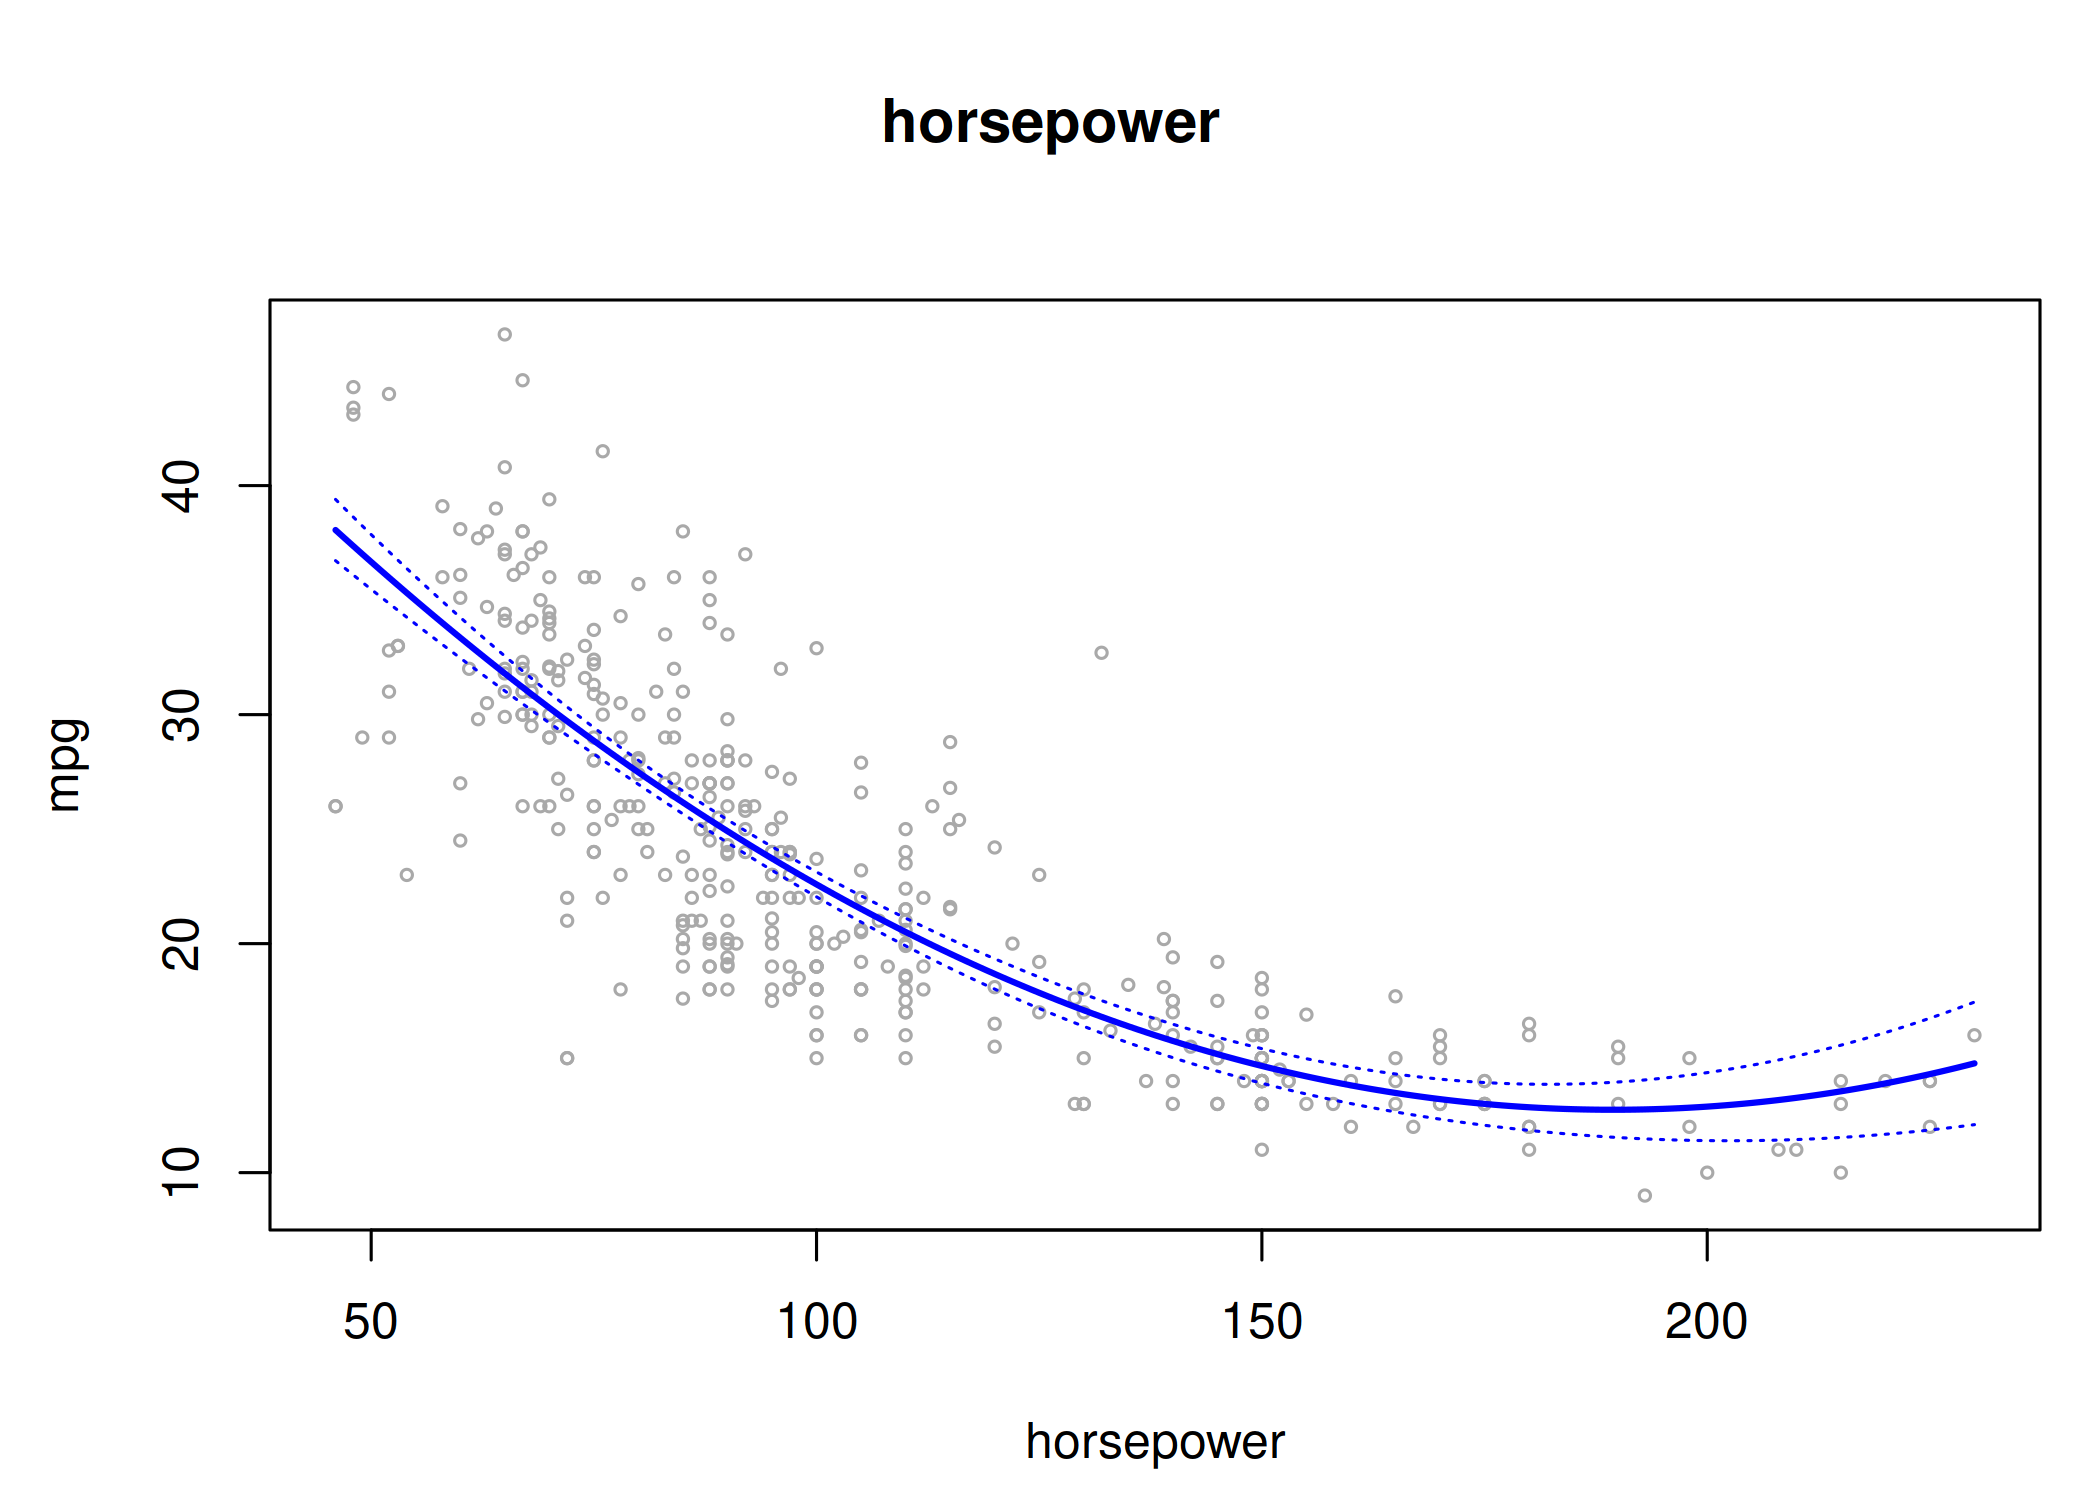

In [76]:
fit <- lm(mpg ~ poly(horsepower, 2), data = Auto)
plot.fit(fit, "horsepower")

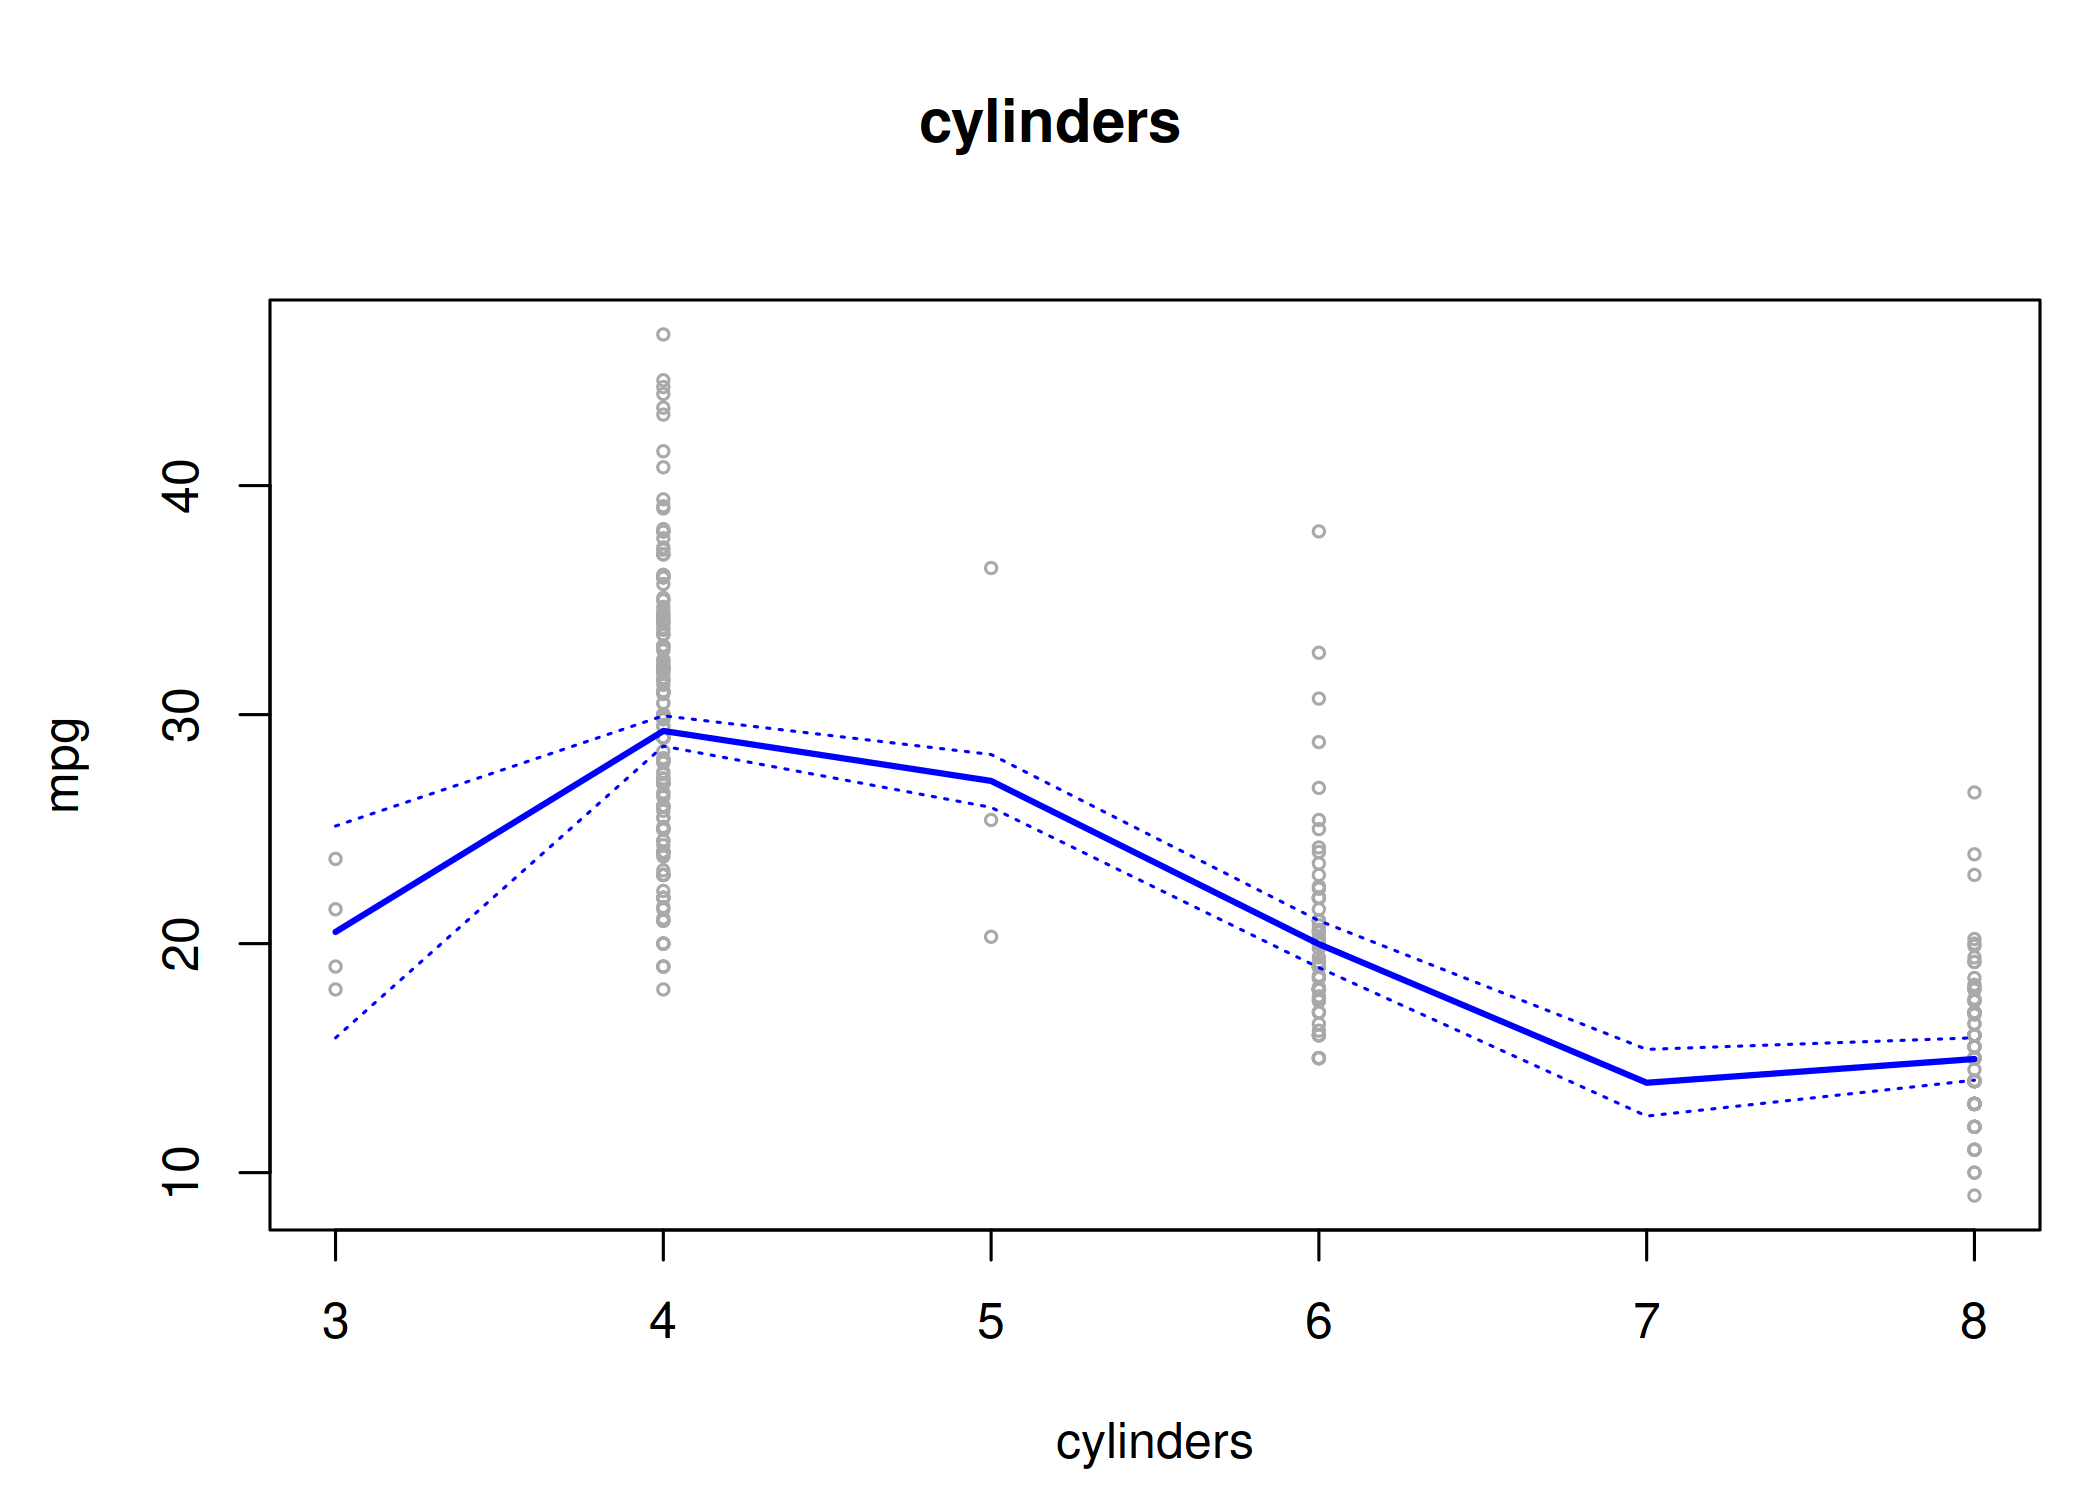

In [77]:
fit <- lm(mpg ~ poly(cylinders, 3), data = Auto)
plot.fit(fit, "cylinders")

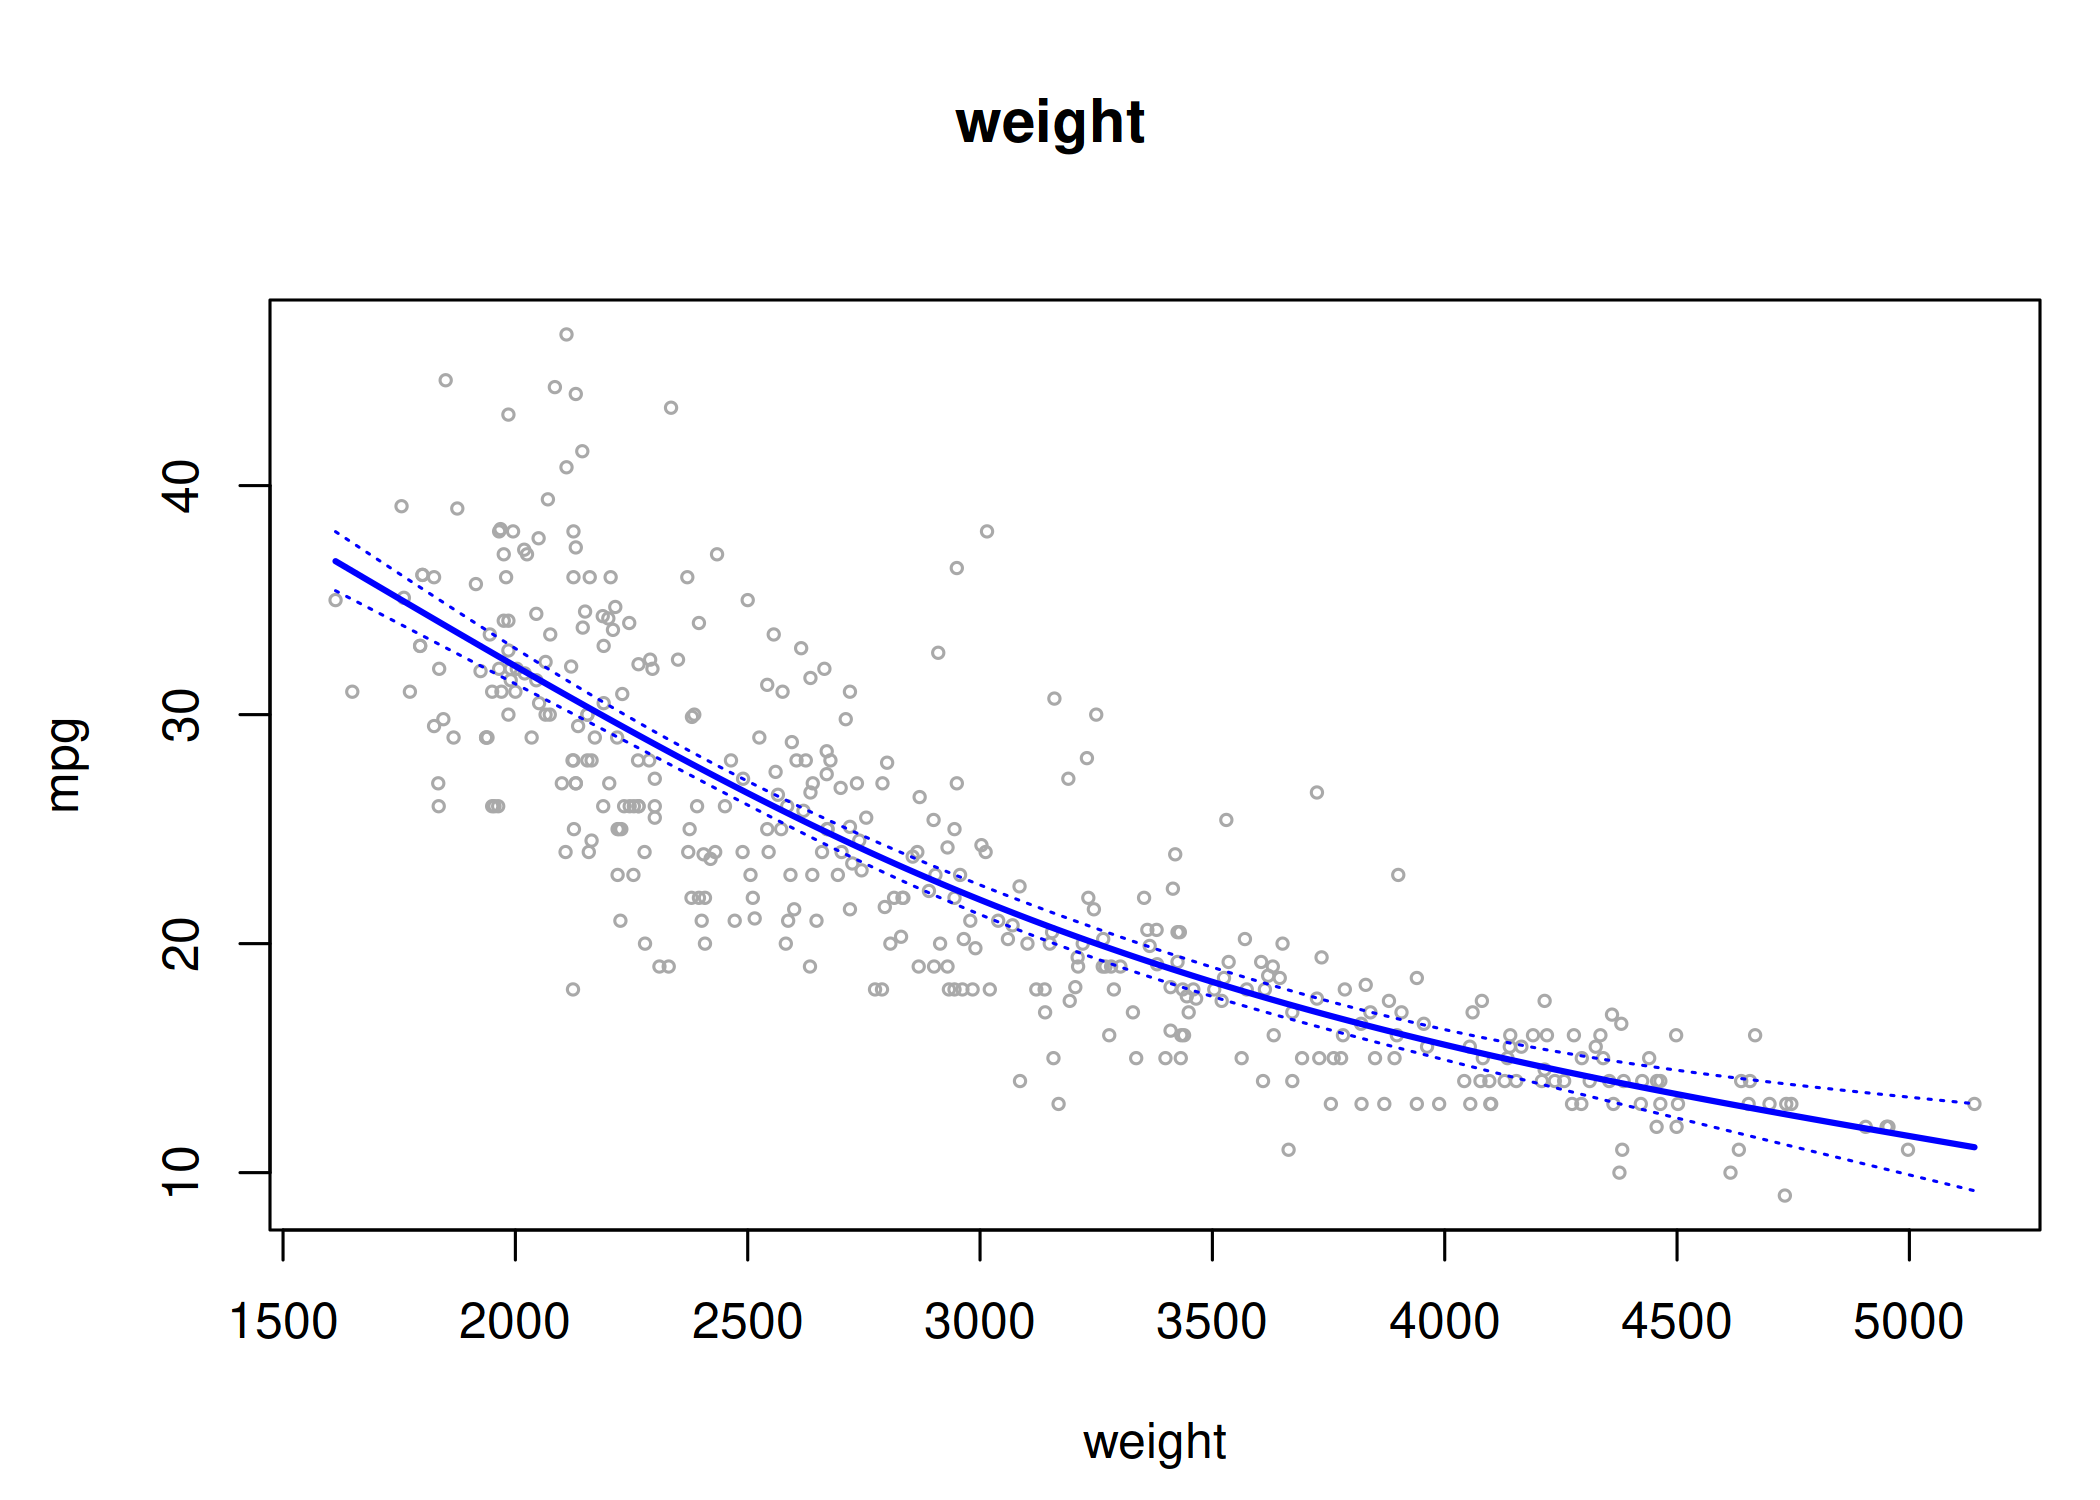

In [78]:
fit <- lm(mpg ~ ns(weight, 2), data = Auto)
plot.fit(fit, "weight")

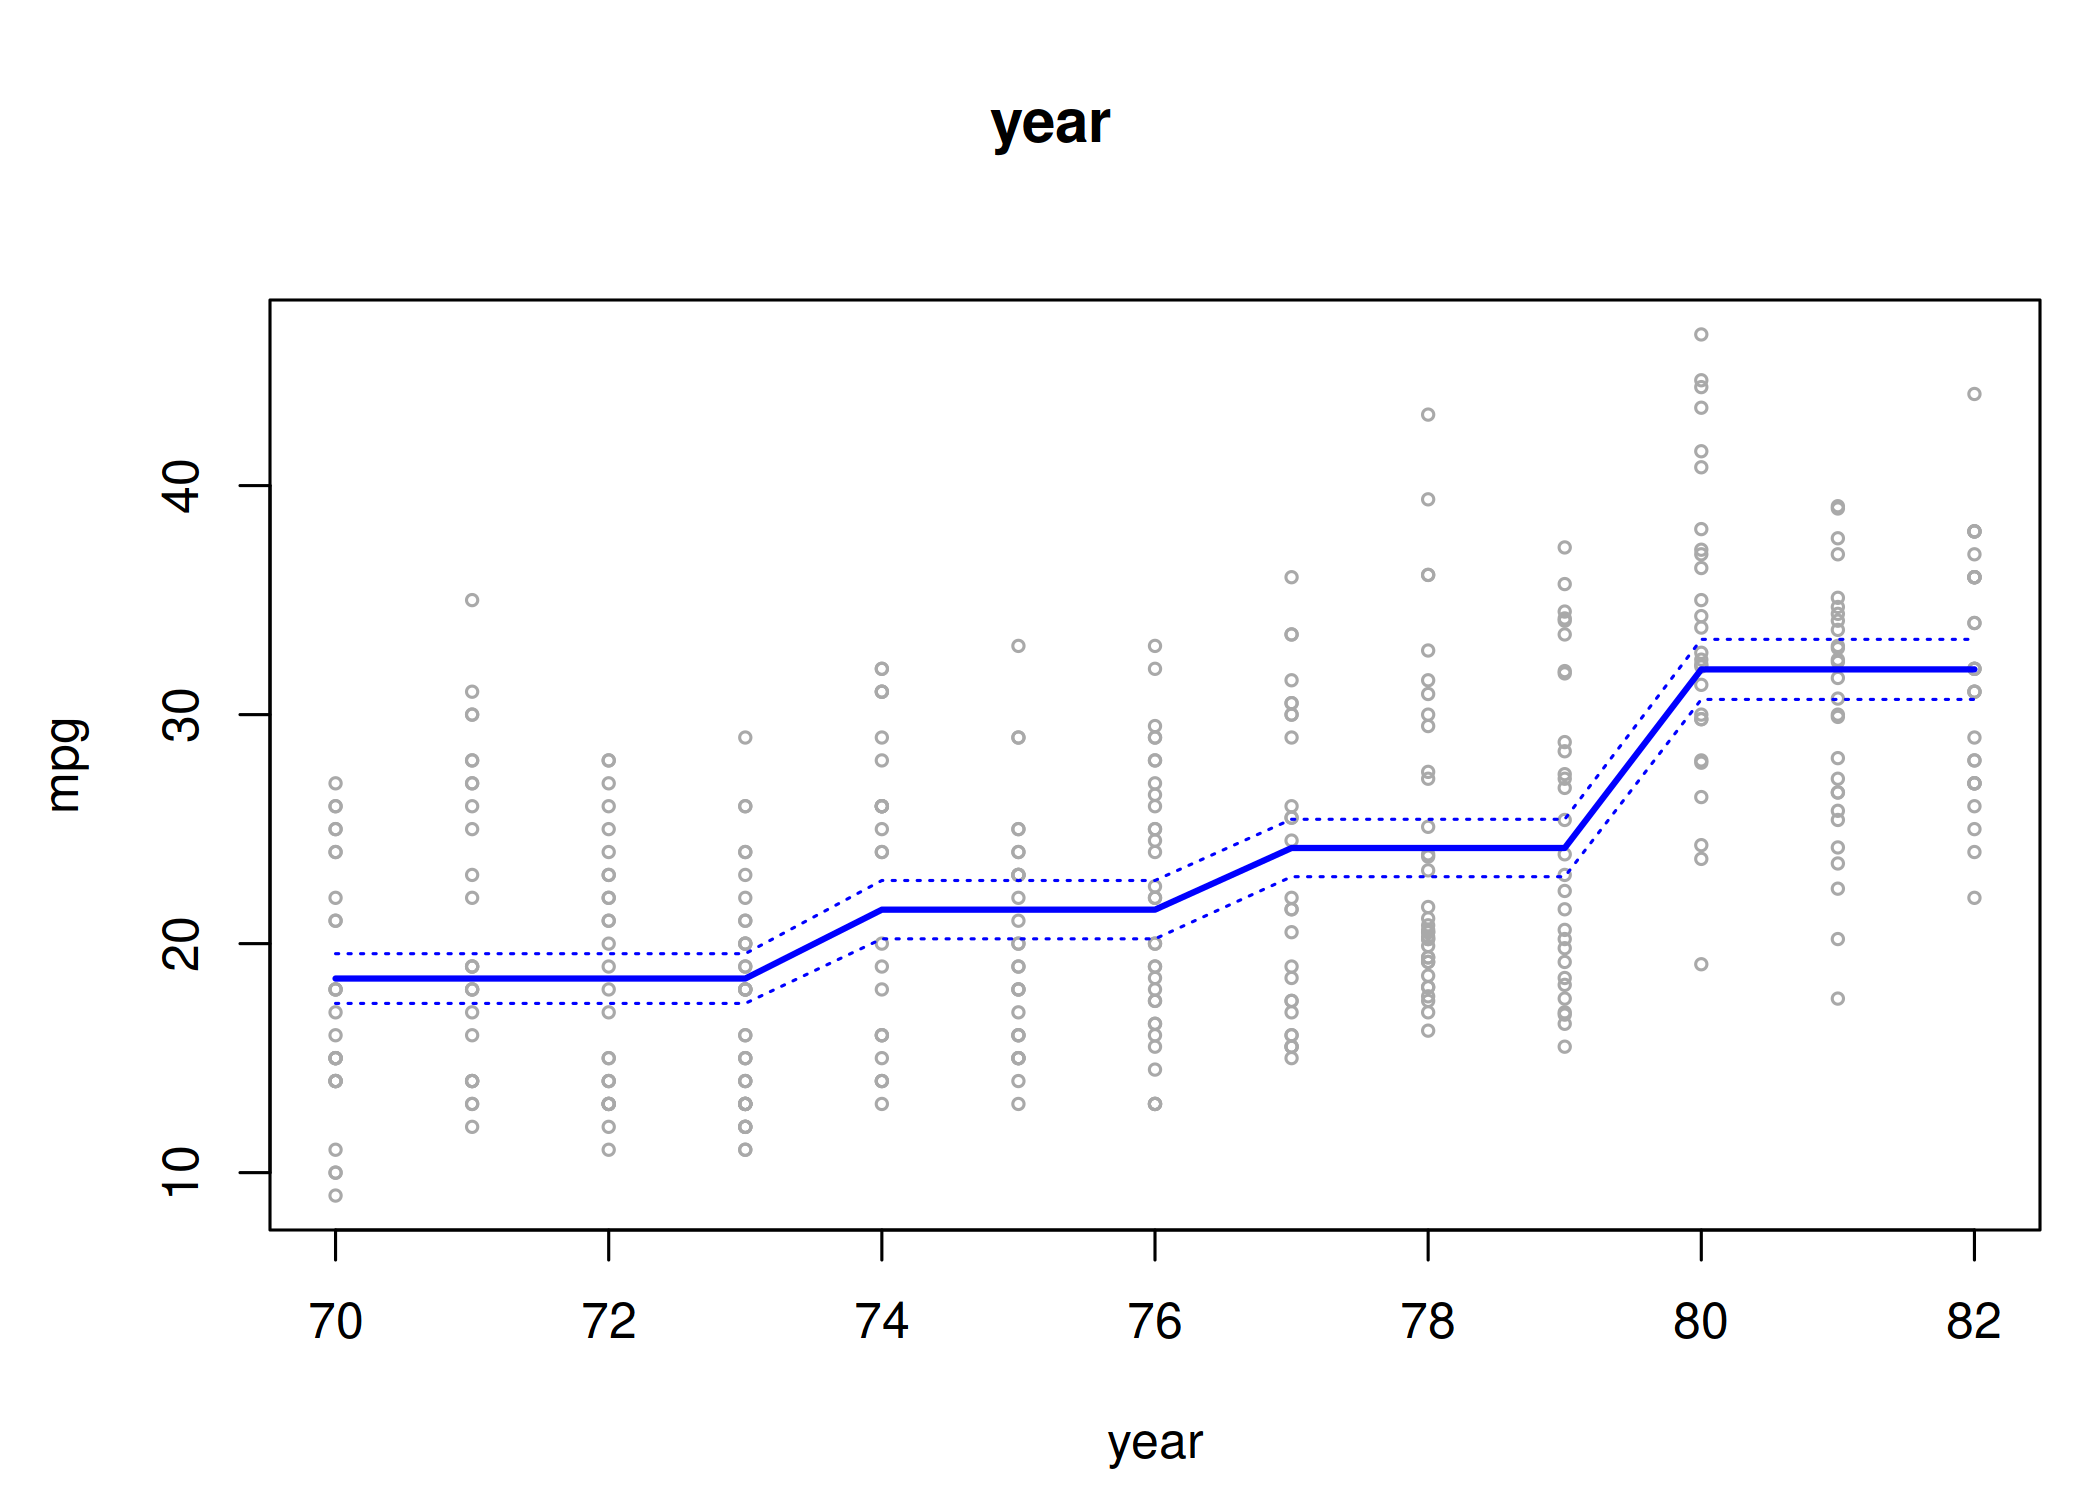

In [79]:
fit <- lm(mpg ~ cut(year, 4), data = Auto)
plot.fit(fit, "year")

Well, I got **cylinders** and **year** wrong all this time. I think they should be treated as factors.

Let’s rerun the best model so far:

In [80]:
set.seed(1)
train <- sample(nrow(Auto), nrow(Auto) / 2)

fit <- lm(mpg ~ poly(horsepower, 2) + poly(cylinders, 3) +
          ns(weight, 2) + cut(year, 4),
          data = Auto, subset = train)
pred <- predict(fit, Auto[-train, ])
poly.mse <- mean((pred - Auto$mpg[-train])^2)
poly.mse

[1] 6.724388

Now let’s try only **year** as categorical:

In [81]:
set.seed(1)
train <- sample(nrow(Auto), nrow(Auto) / 2)

fit <- lm(mpg ~ poly(horsepower, 2) + poly(cylinders, 3) +
          ns(weight, 2) + factor(year),
          data = Auto, subset = train)
pred <- predict(fit, Auto[-train, ])
poly.mse <- mean((pred - Auto$mpg[-train])^2)
poly.mse

[1] 6.554487

And only **cylinders** as categorical:

In [82]:
set.seed(1)
train <- sample(nrow(Auto), nrow(Auto) / 2)

fit <- lm(mpg ~ poly(horsepower, 2) + factor(cylinders) +
          ns(weight, 2) + cut(year, 4),
          data = Auto, subset = train)
pred <- predict(fit, Auto[-train, ])
poly.mse <- mean((pred - Auto$mpg[-train])^2)
poly.mse

[1] 7.100909

Using **year** as categorical yields a better result. However, depending on the use of this model, the year should not be used as categorical variable. For example, it the model should predict *future* cars, than no year other than the ones in the training data set can be reliable.

On the other hand, **cylinders** indeed look as categorical but I got better results with a cubic polynomial of it, so I decided to keep it as is.

### Exercise 9

Use variable **dis** (the weighted mean of distances to five Boston employment centers) and **nox** (nitrogen oxides concentration in parts per 10 million) from the **Boston** data set.

a) Use the `poly()` for a cubic polinomial.

In [83]:
fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


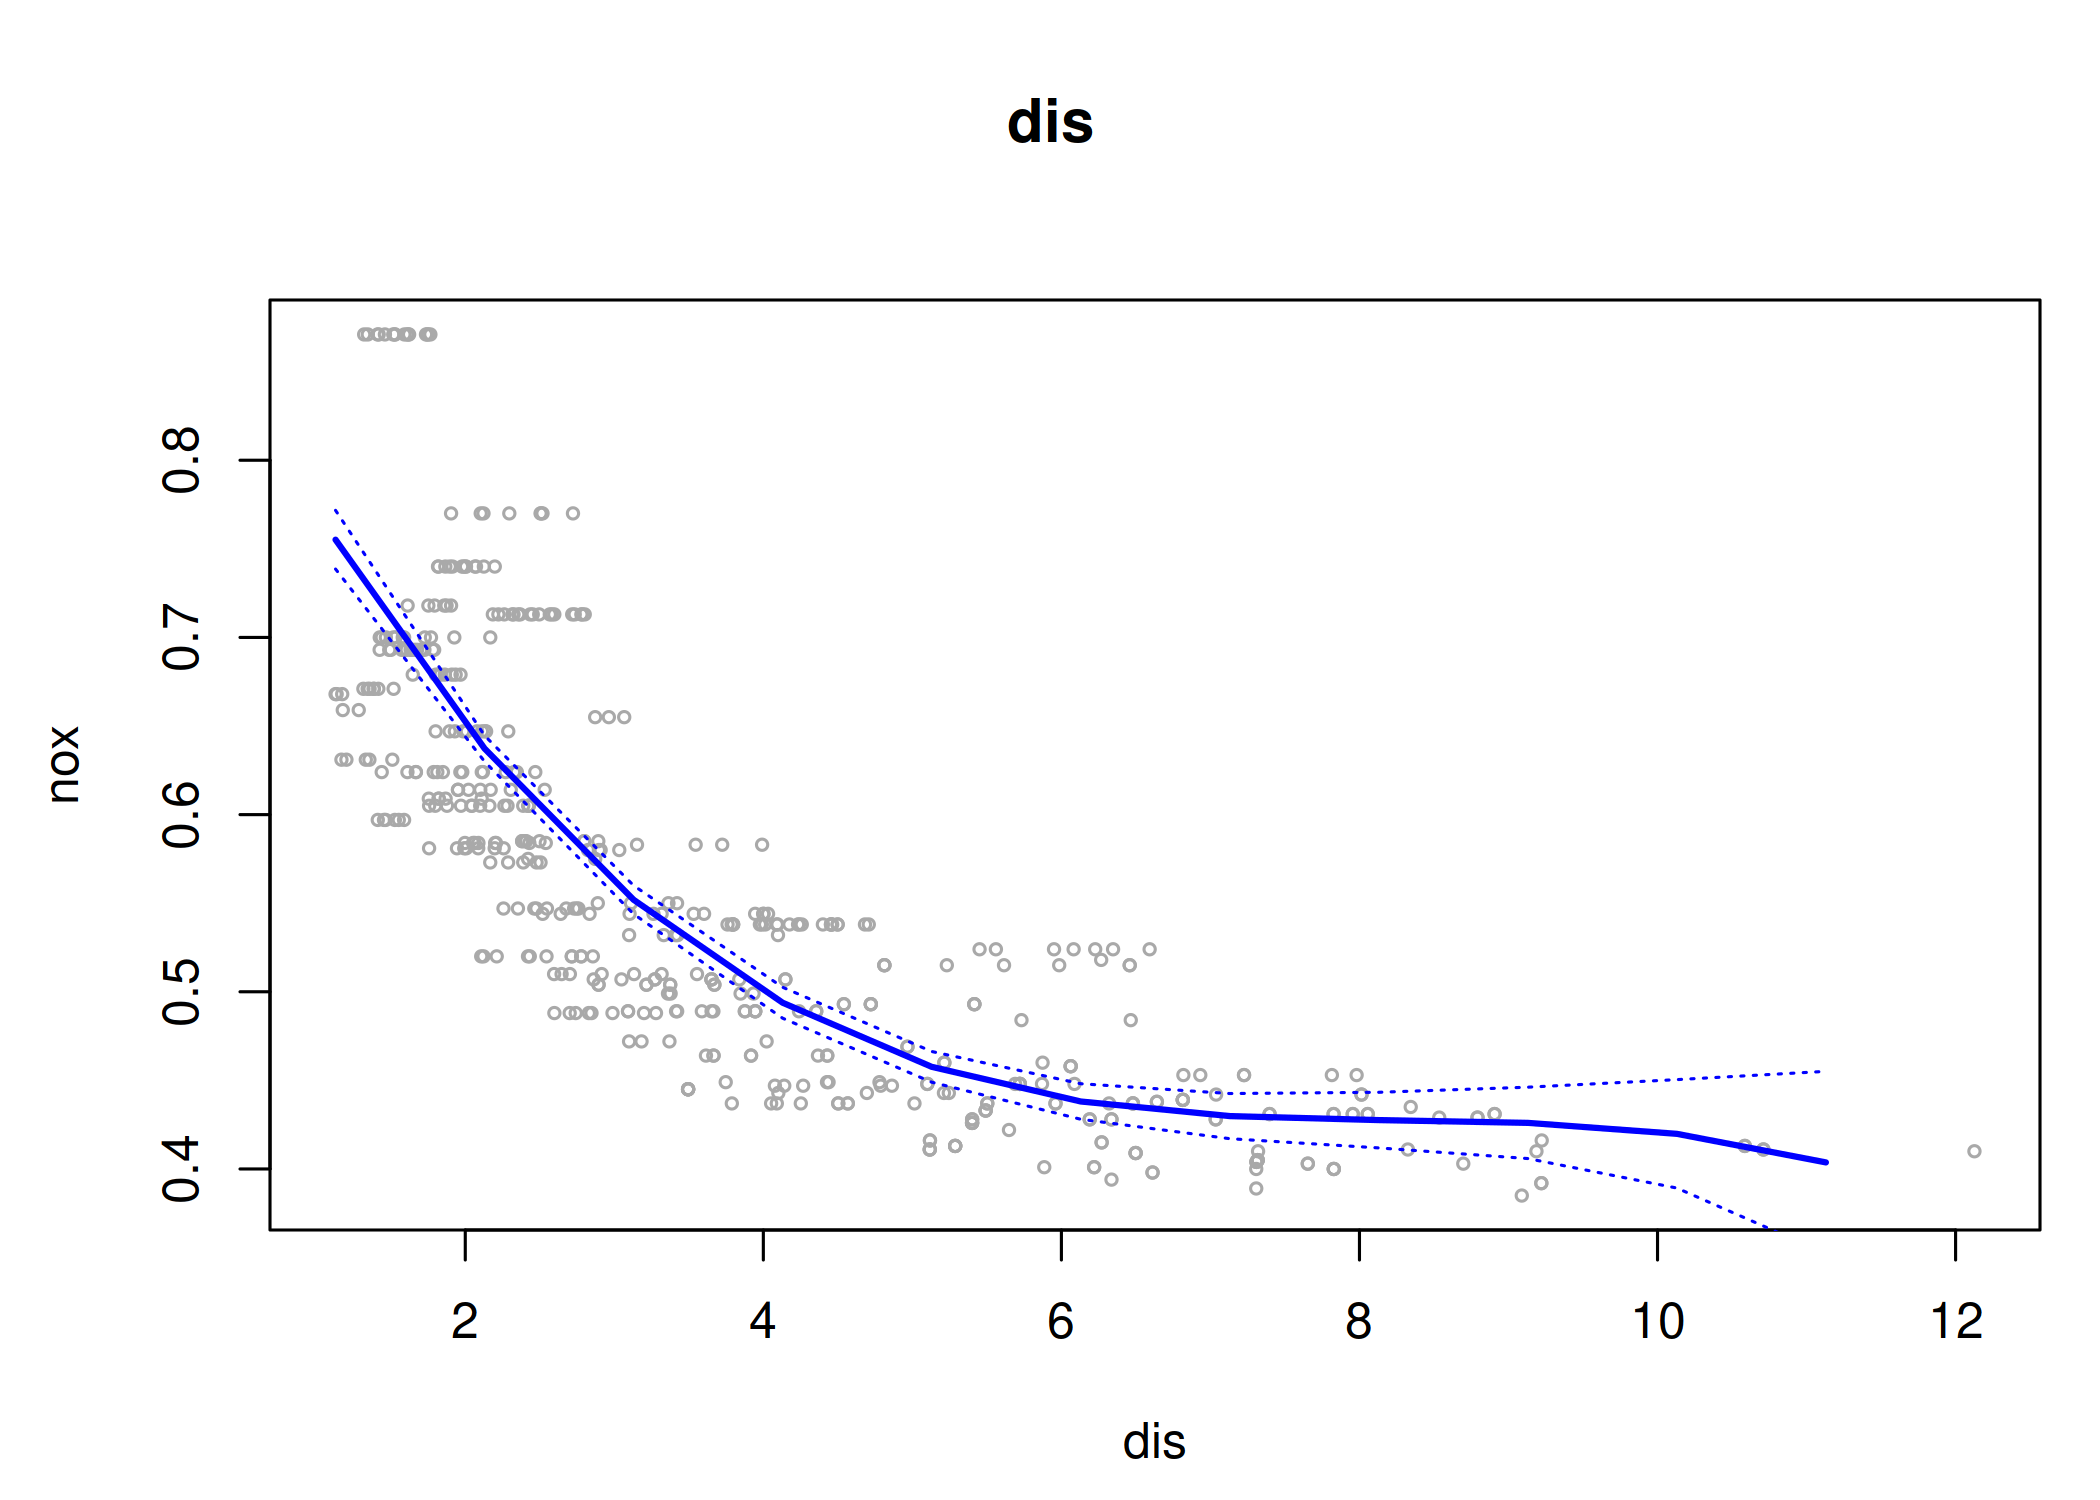

In [84]:
plot.fit <- function(model, feature, add.to.current = FALSE,
                     color = "blue") {
    val.range <- range(Boston[, feature])
    grid <- seq(from = val.range[1], to = val.range[2])
    newdata <- list()
    newdata[[feature]] <- grid
    preds <- predict(fit, newdata = newdata, se = TRUE)
    se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                      preds$fit - 2 * preds$se.fit)

    par(mfrow = c(1, 1),
        mar = c(4.5, 4.5, 1, 1),
        oma = c(0, 0, 4, 0))
    
    if (!add.to.current)
        plot(Boston[, feature], Boston[, "nox"],
             xlim = val.range,
             cex = .5,
             col = "darkgrey",
             xlab = feature,
             ylab = "nox")
    lines(grid, preds$fit, lwd = 2, col = color)
    matlines(grid, se.bands, lwd = 1, col = color, lty = 3)
    title(feature, outer = TRUE)
}

plot.fit(fit, "dis")

1 polynomial RSS: 2.768563 
2 polynomial RSS: 2.035262 
3 polynomial RSS: 1.934107 
4 polynomial RSS: 1.932981 
5 polynomial RSS: 1.91529 
6 polynomial RSS: 1.878257 
7 polynomial RSS: 1.849484 
8 polynomial RSS: 1.83563 
9 polynomial RSS: 1.833331 
10 polynomial RSS: 1.832171 


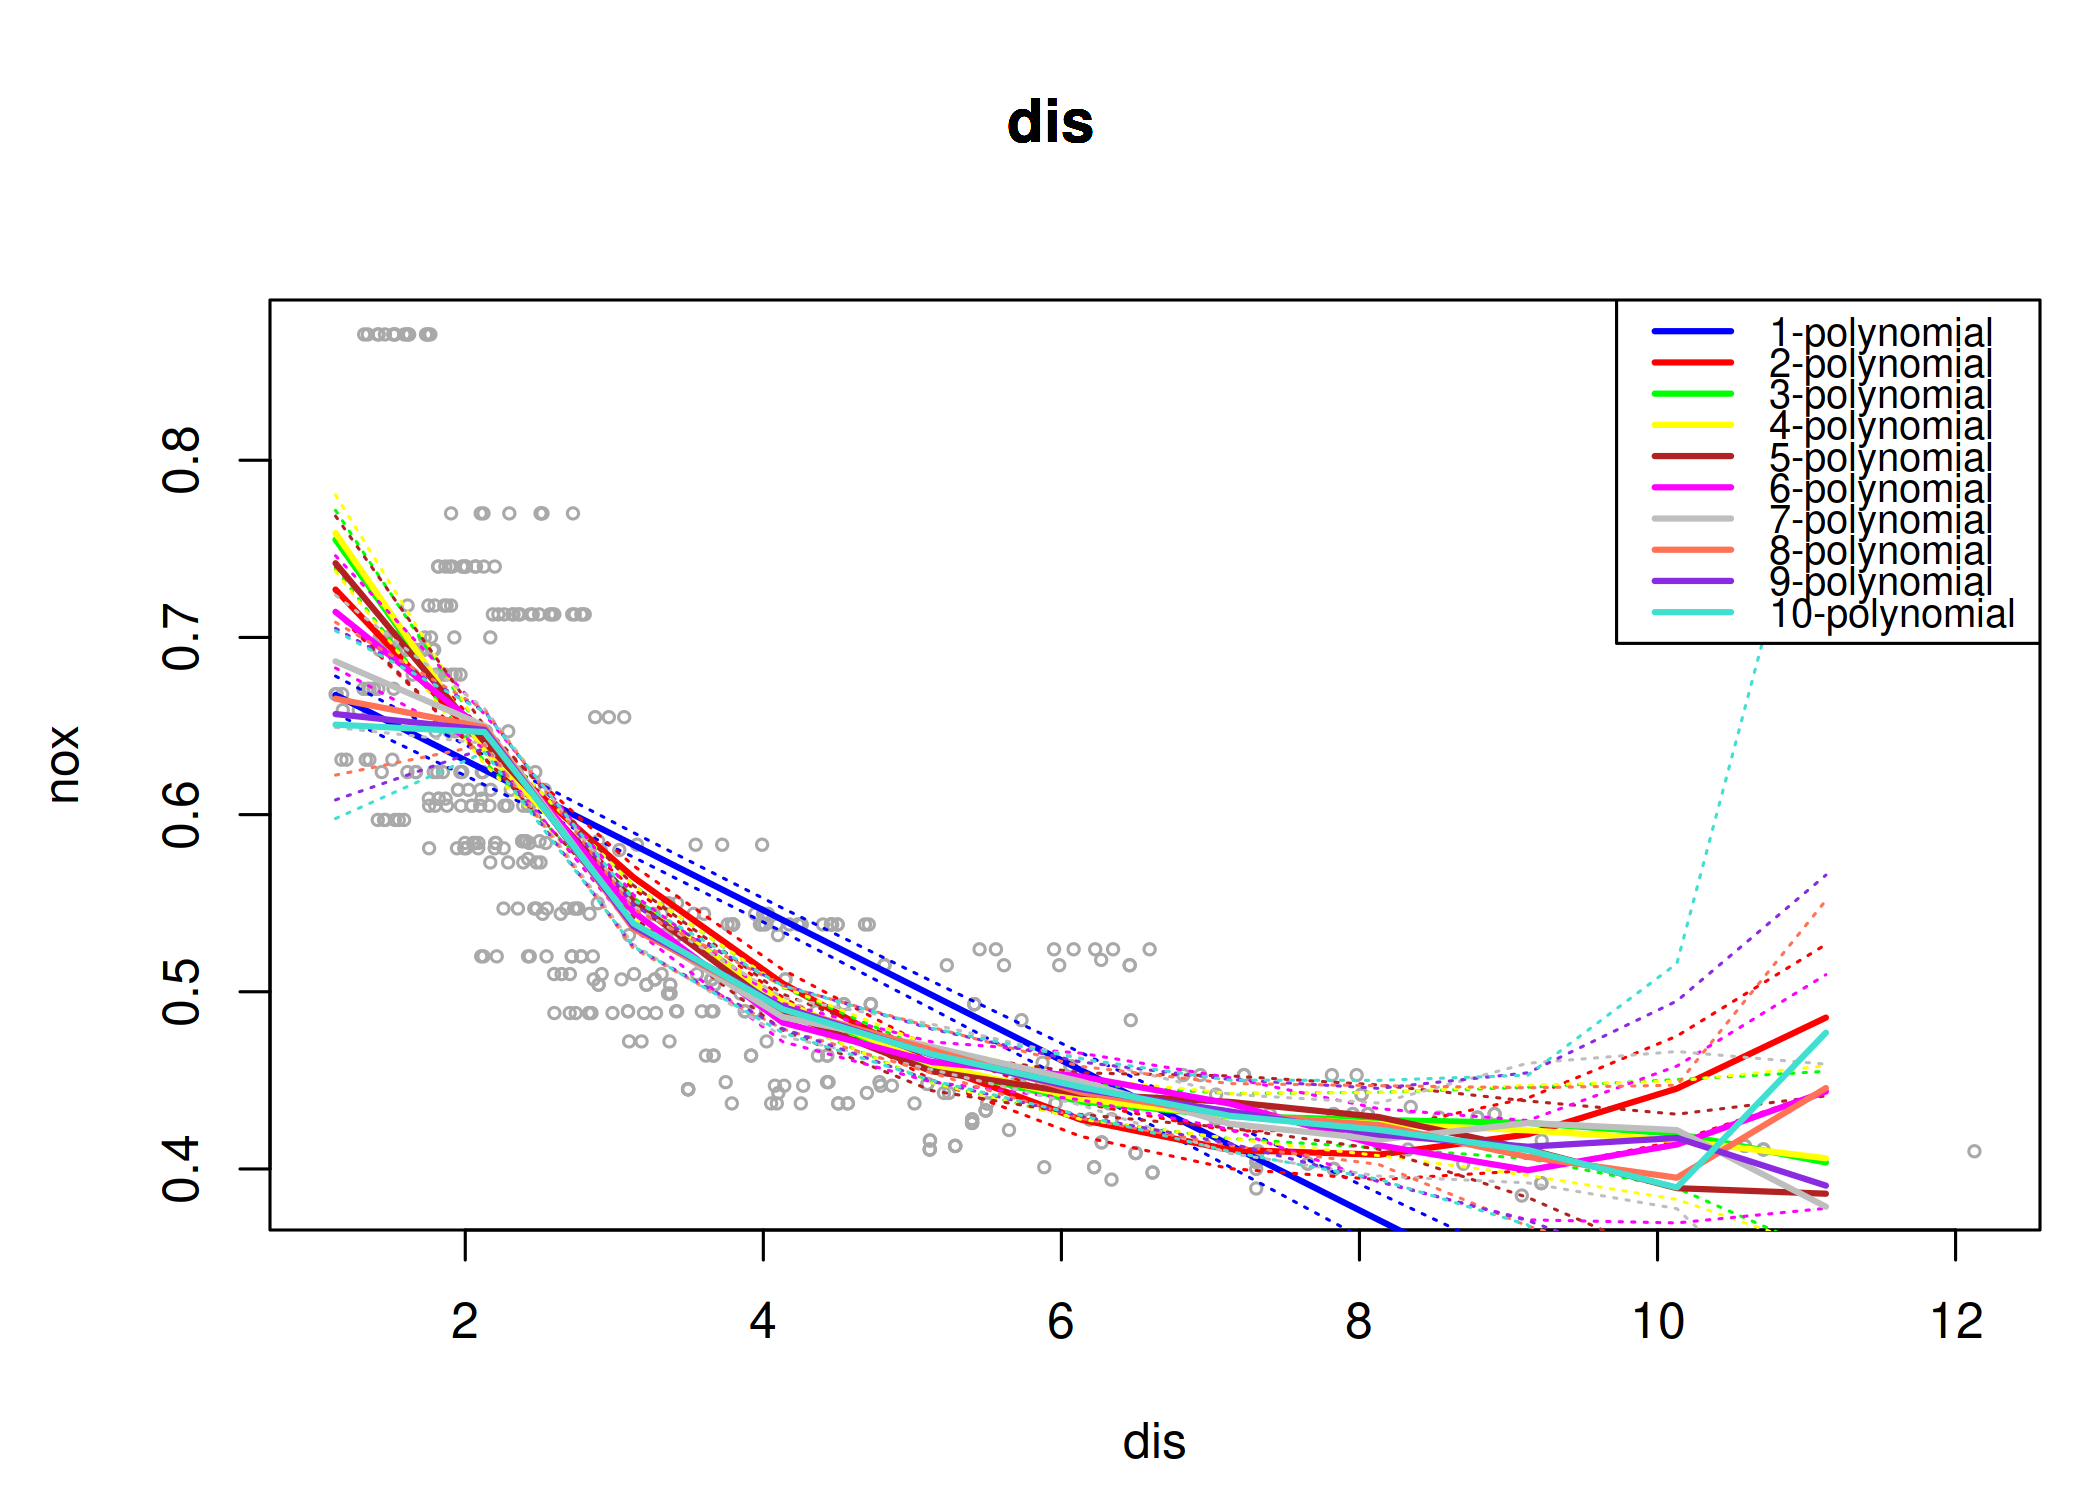

In [85]:
colors <- c("blue", "red", "green", "yellow", "firebrick",
            "magenta", "gray", "coral1", "blueviolet", "turquoise")
for (i in 1:10) {
    fit <- lm(nox ~ poly(dis, i), data = Boston)
    plot.fit(fit, "dis", add.to.current = i != 1,
             color = colors[i])
    cat(i, "polynomial RSS:", sum(resid(fit)^2), "\n")
}
legend("topright", legend = paste0(1:10, "-polynomial"), 
       col = colors, lty = 1, lwd = 2, cex = .8)

In [86]:
crossval <- function(degree, data, folds, feature) {
    foreach(k = unique(folds), .combine = "c") %do% {
        train <- (folds != k)
        eq <- sprintf("nox ~ poly(%s, %d)", feature, degree)
        fit <- lm(as.formula(eq), data = data, subset = train)
        pred <- predict(fit, data[!train, ])
        mean((pred - data[!train, ]$nox)^2)
    }
}

find.degree <- function(data, folds, feature, max.deg = 10) {
    foreach(deg = 1:max.deg, .combine = "rbind") %do% {
        mse <- crossval(deg = deg, data = data, 
                        folds = folds, feature = feature)
        avg.mse <- mean(mse)
        se.mse <- sd(mse) / sqrt(length(unique(folds)))
        data.frame(
            degree = deg,
            min = avg.mse - 1.96*se.mse,
            max = avg.mse + 1.96*se.mse,
            avg = avg.mse
        )
    }
}

set.seed(1)
folds <- sample(10, nrow(Boston), replace = TRUE)

In [87]:
find.degree(Boston, folds, "dis")

degree min           max         avg        
1   1      0.0048166925 0.006224399 0.005520546
2   2      0.0035880329 0.004600022 0.004094027
3   3      0.0034315635 0.004377923 0.003904743
4   4      0.0034294420 0.004376391 0.003902917
5   5      0.0034368732 0.004878722 0.004157798
6   6      0.0023402295 0.008209871 0.005275050
7   7     -0.0002693495 0.016109411 0.007920031
8   8     -0.0003886505 0.016485780 0.008048565
9   9     -0.0005916076 0.017118412 0.008263402
10 10     -0.0070319555 0.037032758 0.015000401

The optimal following a 10-fold cross-validation is `poly(dis, 4)`.

In [88]:
set.seed(1)
train <- sample(nrow(Boston), nrow(Boston) / 2)

fit <- lm(nox ~ poly(dis, 4), data = Boston, subset = train)
pred <- predict(fit, Boston[-train, ])
poly.mse <- mean((pred - Boston$nox[-train])^2)
poly.mse

[1] 0.003652429

d) Use the `bs()`  to fit a regression spline to predict **nox** using **dis**.  Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

In [89]:
set.seed(1)
train <- sample(nrow(Boston), nrow(Boston) / 2)

fit <- lm(nox ~ ns(dis, 4), data = Boston, subset = train)
pred <- predict(fit, Boston[-train, ])
poly.mse <- mean((pred - Boston$nox[-train])^2)
poly.mse

[1] 0.003626576

In [90]:
attr(bs(Boston$dis, 4), "knots")

50% 
3.20745

In [91]:
plot.fit <- function(model, feature) {
    val.range <- range(Boston[, feature])
    grid <- seq(from = val.range[1], to = val.range[2])
    newdata <- list()
    newdata[[feature]] <- grid
    preds <- predict(fit, newdata = newdata, se = TRUE)
    se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                      preds$fit - 2 * preds$se.fit)

    par(mfrow = c(1, 1),
        mar = c(4.5, 4.5, 1, 1),
        oma = c(0, 0, 4, 0))
    
    plot(Boston[, feature], Boston[, "nox"],
         xlim = val.range,
         cex = .5,
         col = "darkgrey",
         xlab = feature,
         ylab = "mpg")
    lines(grid, preds$fit, lwd = 2, col = "blue")
    matlines(grid, se.bands, lwd = 1, col = "blue", lty = 3)
    title(feature, outer = TRUE)
}

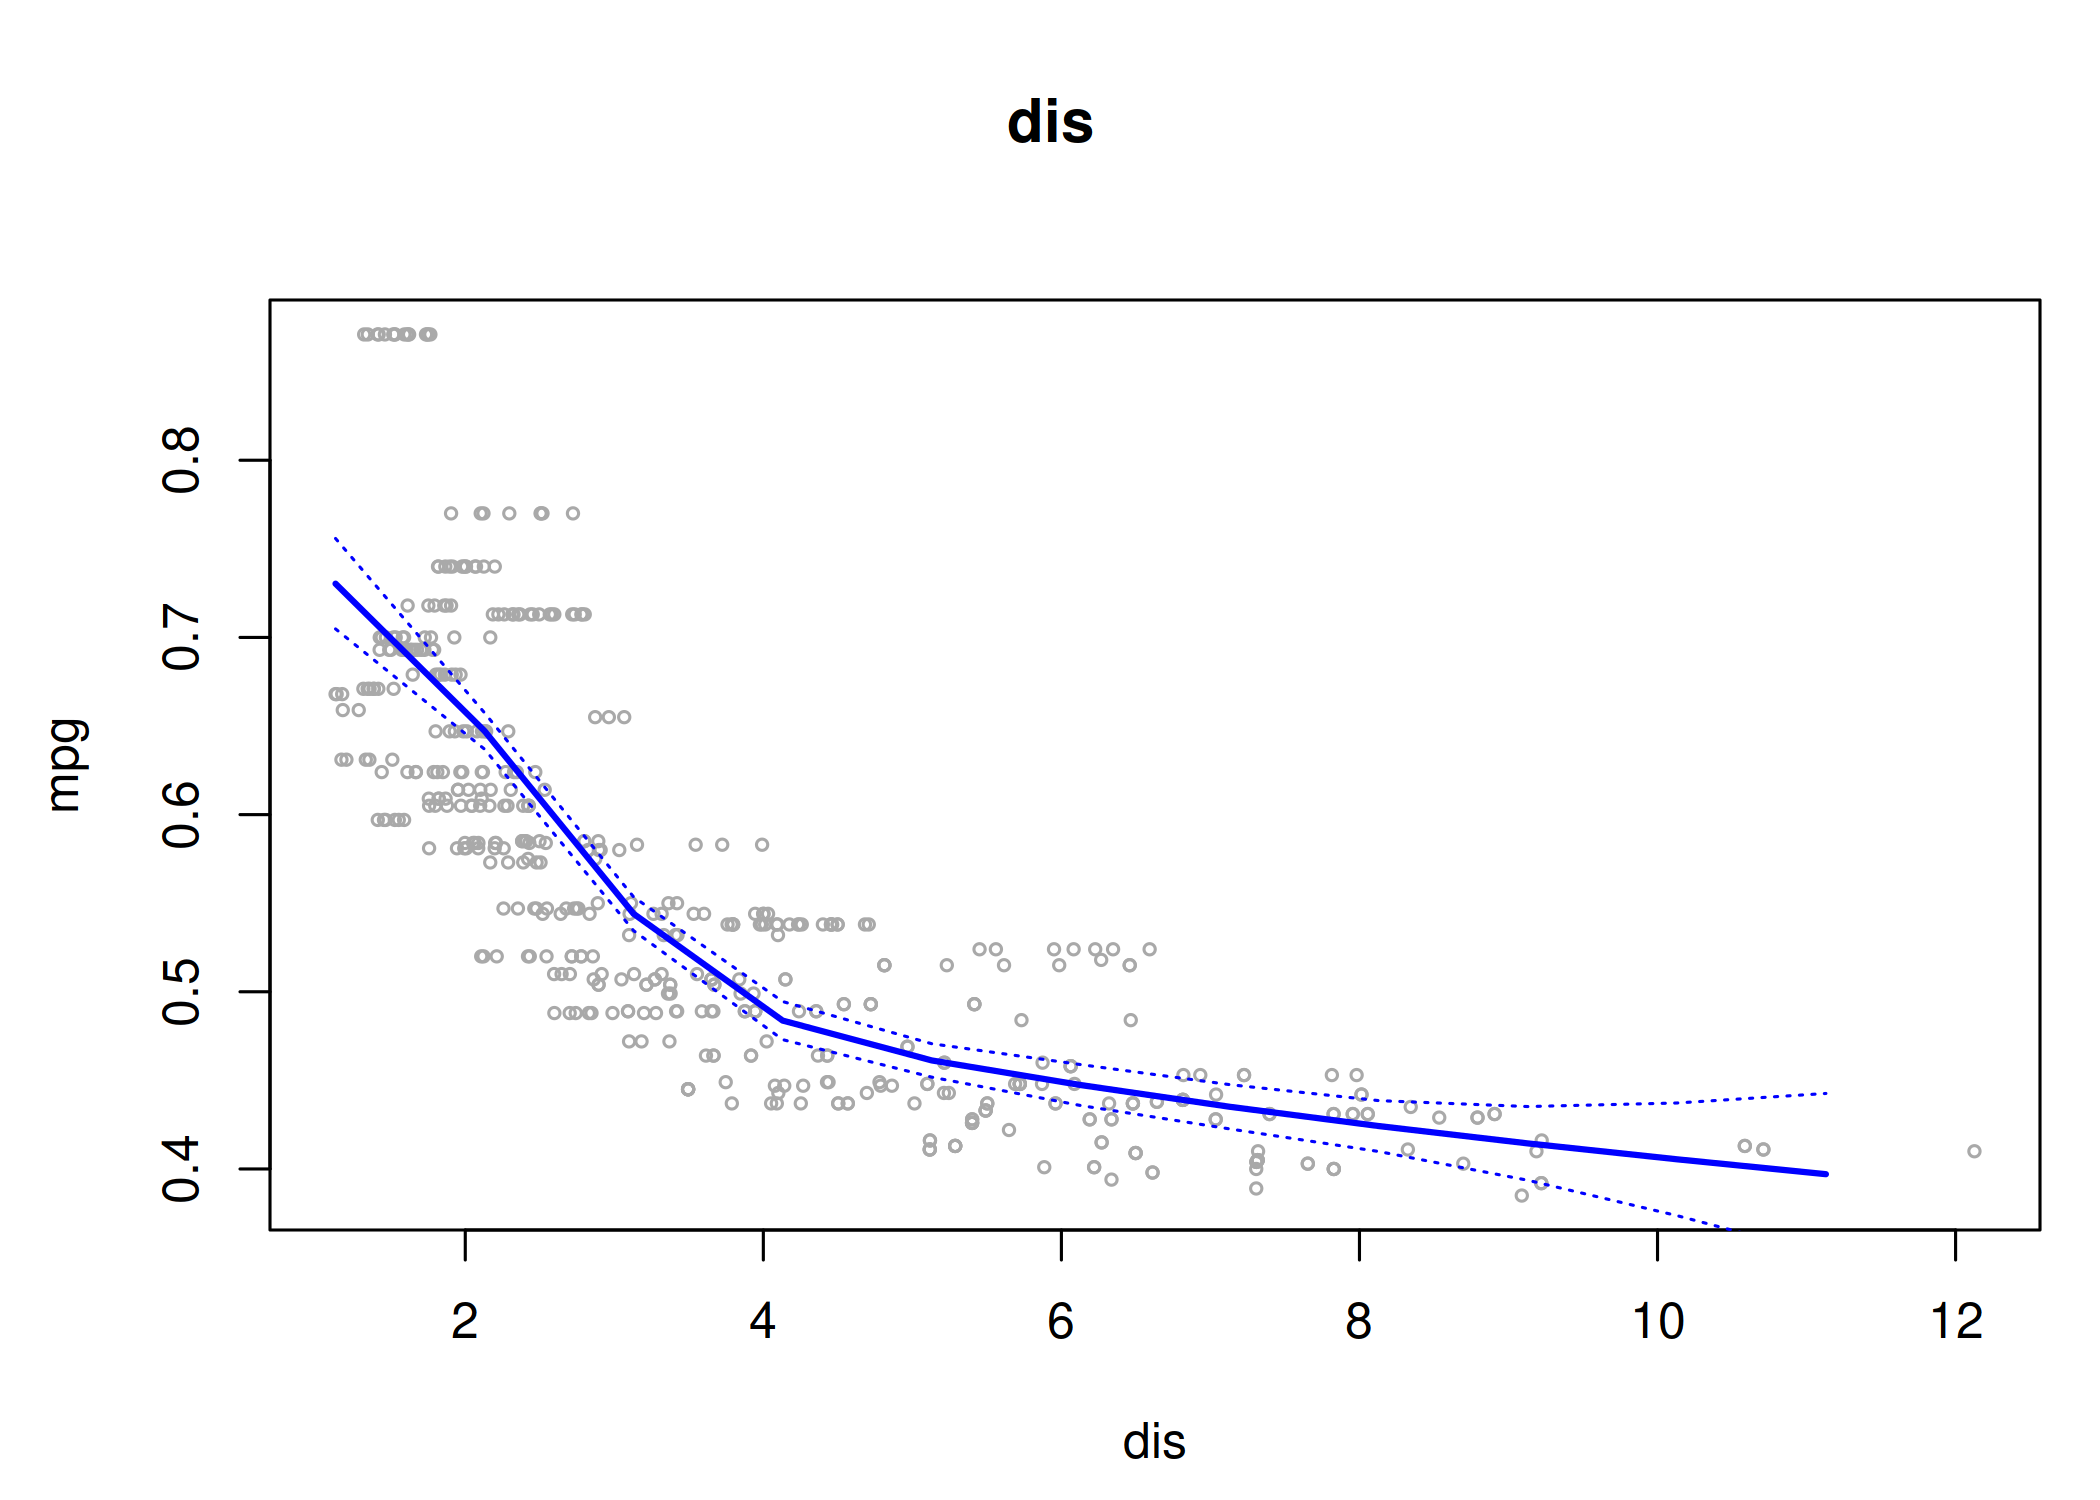

In [92]:
fit <- lm(nox ~ ns(dis, 4), data = Boston)
plot.fit(fit, "dis")

e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

In [93]:
plot.fit <- function(model, feature, add.to.current = FALSE,
                     color = "blue") {
    val.range <- range(Boston[, feature])
    grid <- seq(from = val.range[1], to = val.range[2])
    newdata <- list()
    newdata[[feature]] <- grid
    preds <- predict(fit, newdata = newdata, se = TRUE)
    se.bands <- cbind(preds$fit + 2 * preds$se.fit, 
                      preds$fit - 2 * preds$se.fit)

    par(mfrow = c(1, 1),
        mar = c(4.5, 4.5, 1, 1),
        oma = c(0, 0, 4, 0))
    
    if (!add.to.current)
        plot(Boston[, feature], Boston[, "nox"],
             xlim = val.range,
             cex = .5,
             col = "darkgrey",
             xlab = feature,
             ylab = "nox")
    lines(grid, preds$fit, lwd = 2, col = color)
    matlines(grid, se.bands, lwd = 1, col = color, lty = 3)
    title(feature, outer = TRUE)
}

Warning message in bs(dis, df = i):
“'df' was too small; have used 3”

1 polynomial RSS: 1.934107 


Warning message in bs(dis, df = i):
“'df' was too small; have used 3”

2 polynomial RSS: 1.934107 
3 polynomial RSS: 1.934107 
4 polynomial RSS: 1.922775 
5 polynomial RSS: 1.840173 
6 polynomial RSS: 1.833966 
7 polynomial RSS: 1.829884 
8 polynomial RSS: 1.816995 
9 polynomial RSS: 1.825653 
10 polynomial RSS: 1.792535 


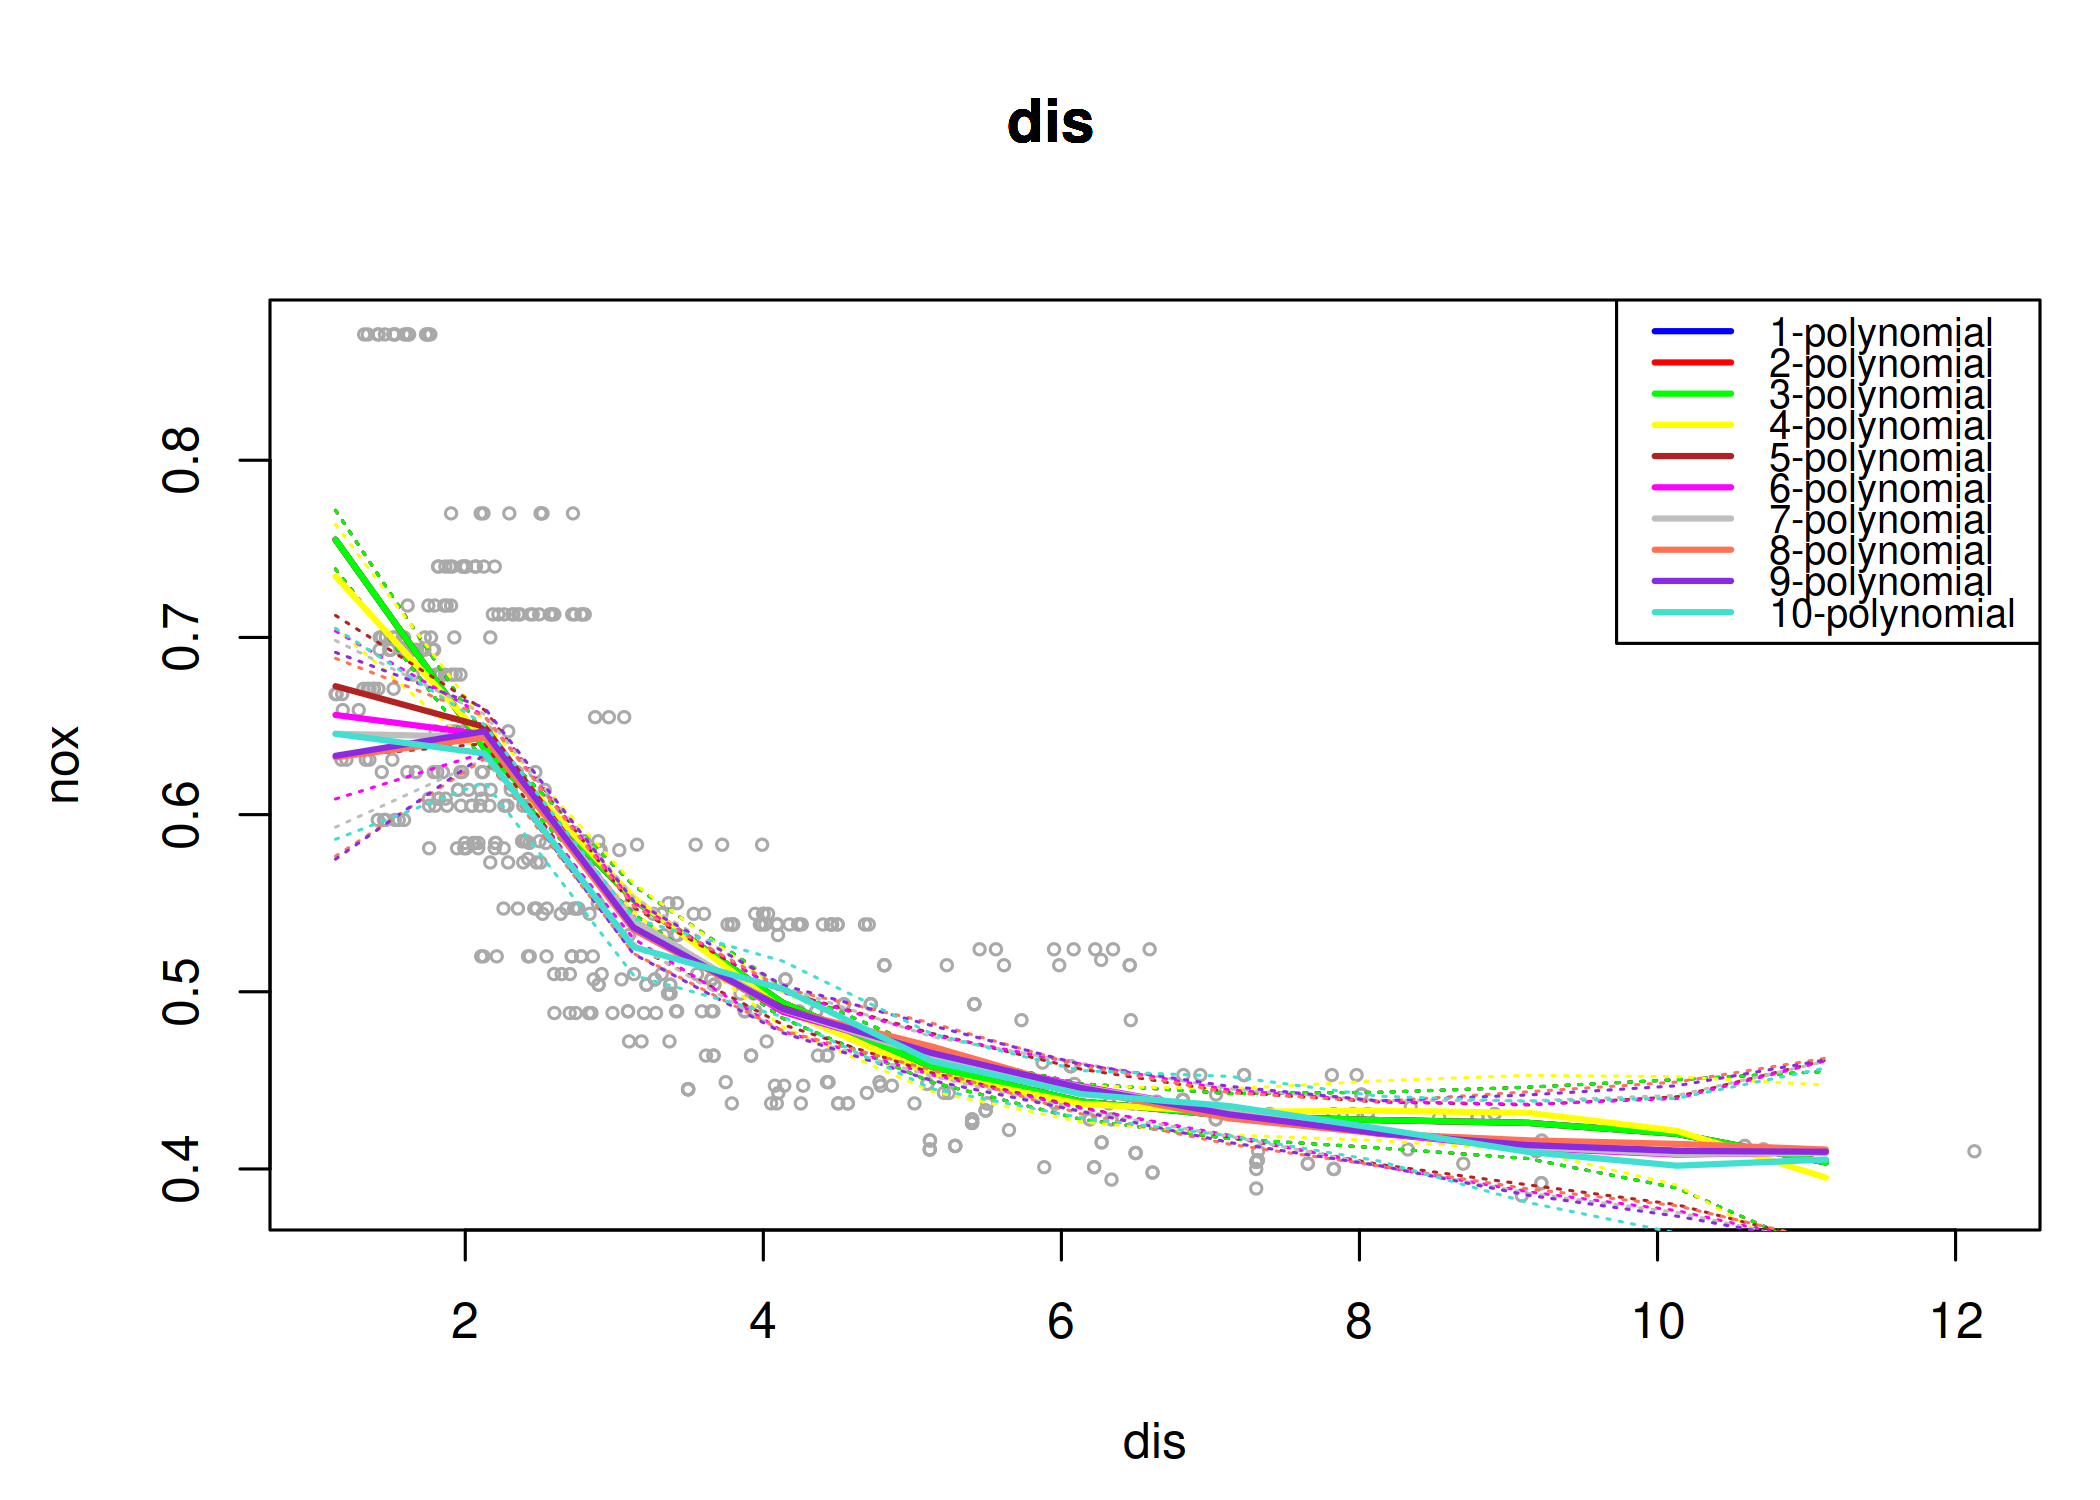

In [94]:
colors <- c("blue", "red", "green", "yellow", "firebrick",
            "magenta", "gray", "coral1", "blueviolet", "turquoise")
for (i in 1:10) {
    fit <- lm(nox ~ bs(dis, df = i), data = Boston)
    plot.fit(fit, "dis", add.to.current = i != 1,
             color = colors[i])
    cat(i, "polynomial RSS:", sum(resid(fit)^2), "\n")
}
legend("topright", legend = paste0(1:10, "-polynomial"), 
       col = colors, lty = 1, lwd = 2, cex = .8)

Three of four degrees of freedom looks good.

In [95]:
crossval <- function(degree, data, folds, feature) {
    foreach(k = unique(folds), .combine = "c") %do% {
        train <- (folds != k)
        eq <- sprintf("nox ~ bs(%s, %d)", feature, degree)
        fit <- lm(as.formula(eq), data = data, subset = train)
        pred <- predict(fit, data[!train, ])
        mean((pred - data[!train, ]$nox)^2)
    }
}

find.degree <- function(data, folds, feature, max.deg = 10) {
    foreach(deg = 3:max.deg, .combine = "rbind") %do% {
        mse <- crossval(deg = deg, data = data, 
                        folds = folds, feature = feature)
        avg.mse <- mean(mse)
        se.mse <- sd(mse) / sqrt(length(unique(folds)))
        data.frame(
            degree = deg,
            min = avg.mse - 1.96*se.mse,
            max = avg.mse + 1.96*se.mse,
            avg = avg.mse
        )
    }
}

set.seed(1)
folds <- sample(10, nrow(Boston), replace = TRUE)

In [96]:
find.degree(Boston, folds, "dis")

degree min         max         avg        
1  3     0.003431563 0.004377923 0.003904743
2  4     0.003424756 0.004366952 0.003895854
3  5     0.003272335 0.004190280 0.003731307
4  6     0.003287935 0.004190758 0.003739347
5  7     0.003310198 0.004192582 0.003751390
6  8     0.003302117 0.004161642 0.003731879
7  9     0.003333476 0.004195288 0.003764382
8 10     0.003325077 0.004149107 0.003737092

In [97]:
set.seed(1)
train <- sample(nrow(Boston), nrow(Boston) / 2)

fit <- lm(nox ~ bs(dis, 5), data = Boston, subset = train)
pred <- predict(fit, Boston[-train, ])
poly.mse <- mean((pred - Boston$nox[-train])^2)
poly.mse

[1] 0.003582112

### Exercise 10

Use the **College** data set.

a) Split the data into training and test set.

In [98]:
set.seed(1)
train <- sample(nrow(College), nrow(College) / 2)
test <- -train

In [99]:
head(College)

Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate
Abilene Christian University 60       
Adelphi University           56       
Adrian College               54       
Agnes Scott College          59       
Alaska Pacific University    15       
Albertson College            55

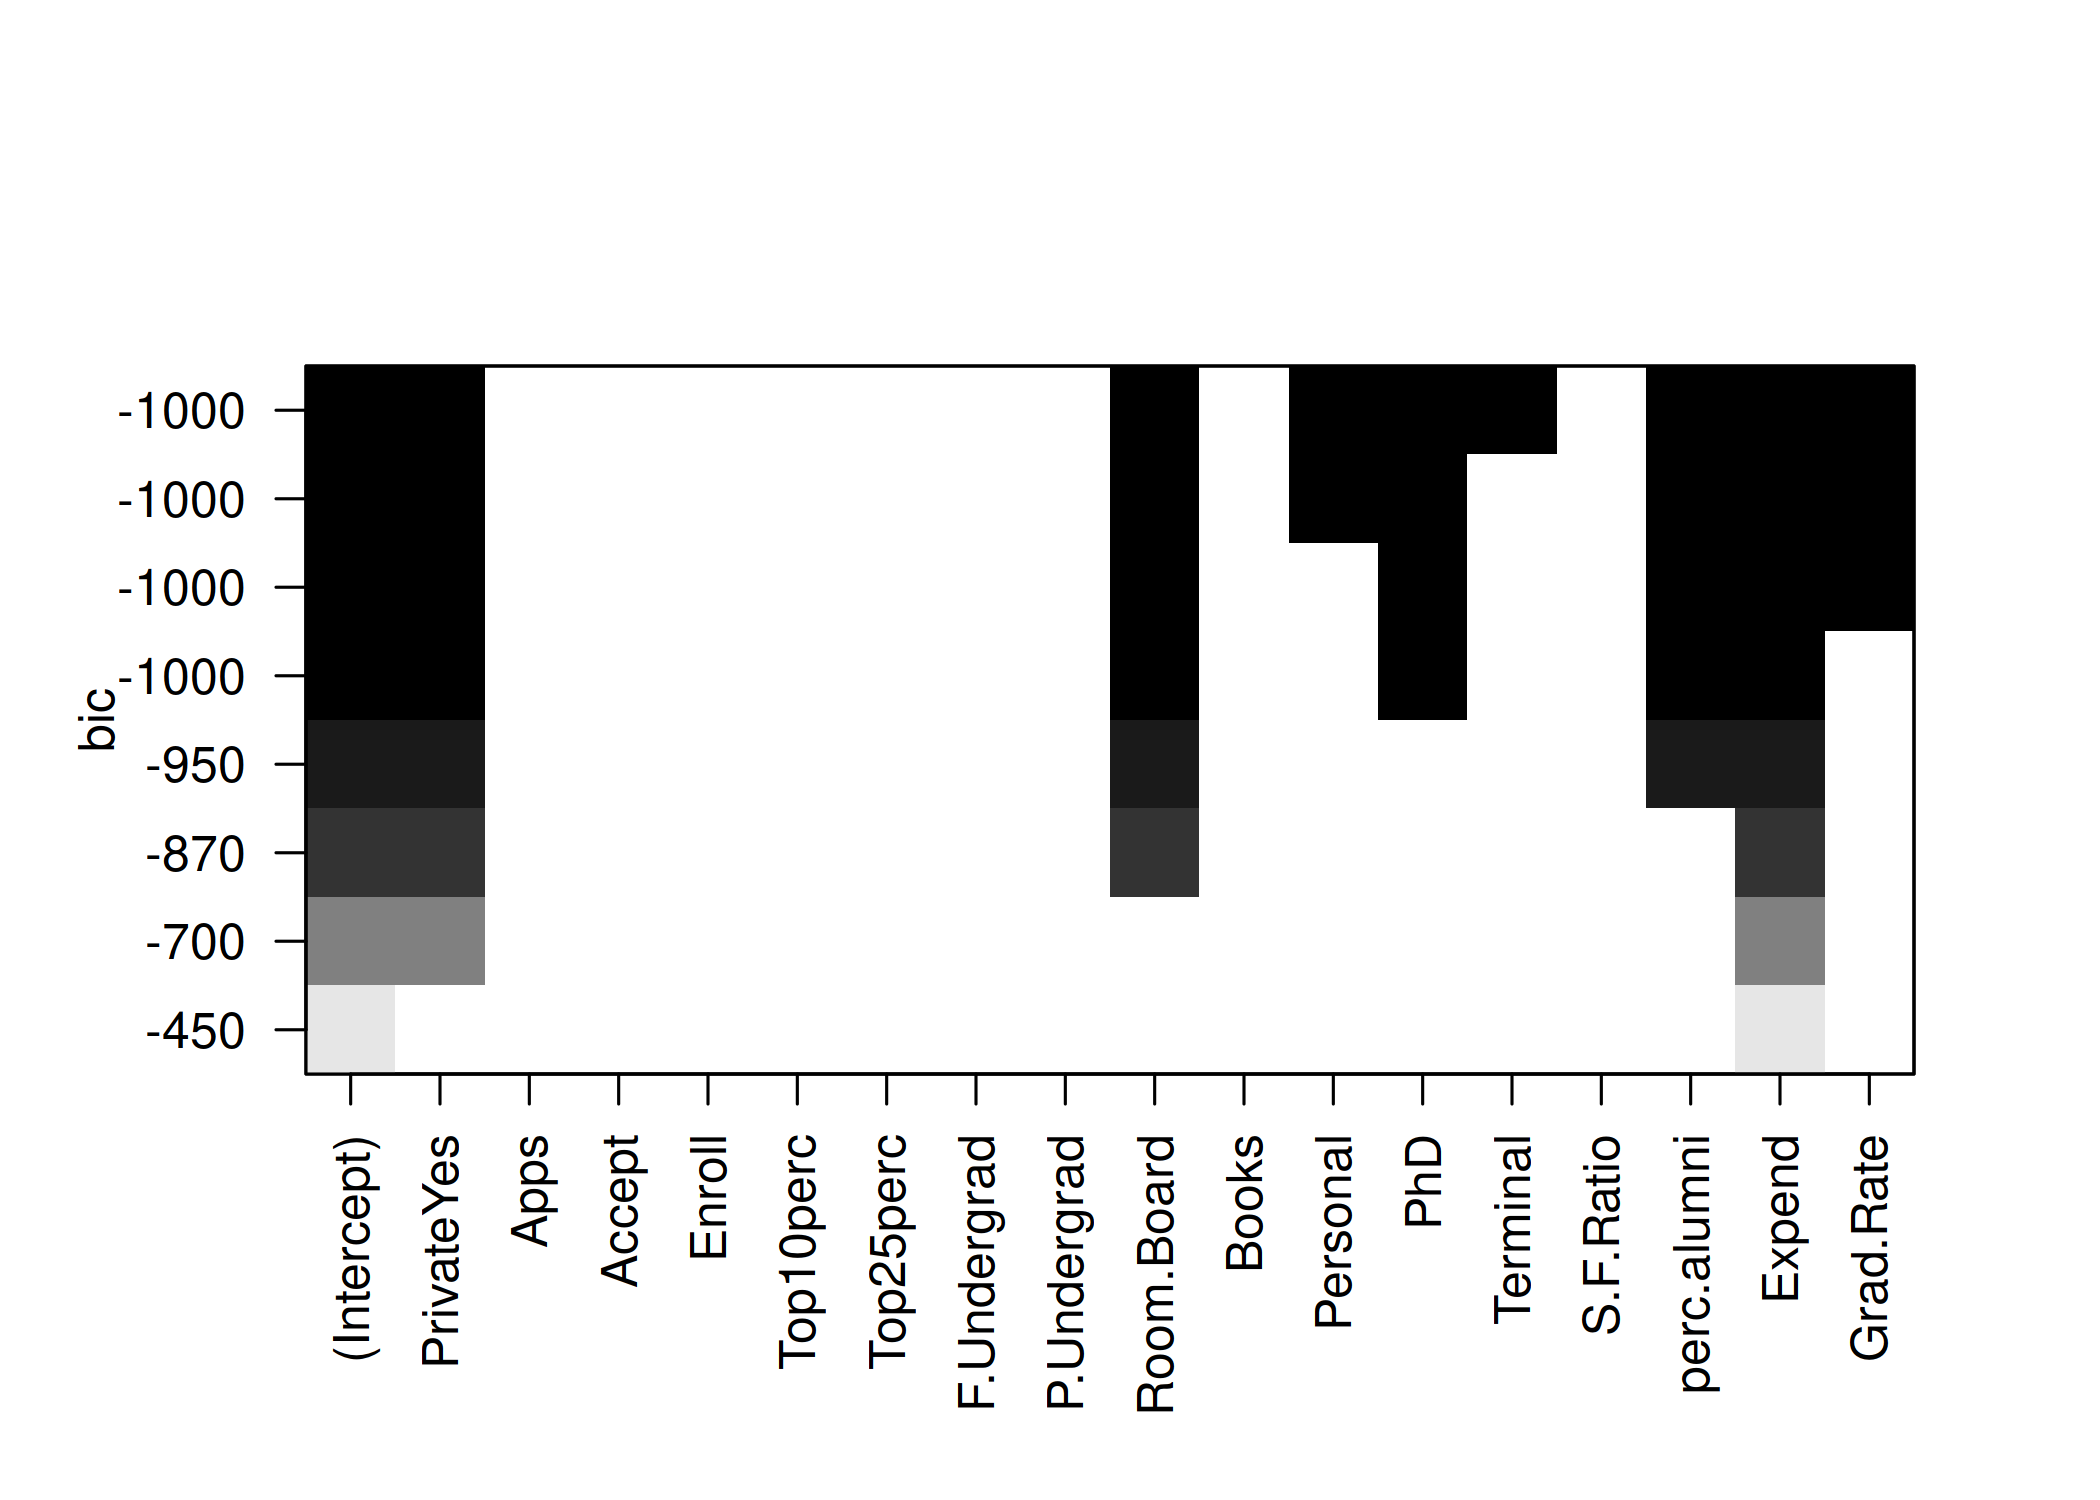

In [100]:
regfit <- regsubsets(Outstate ~ ., data = College,
                     method = "forward")
plot(regfit)

In [101]:
data.frame(coef(regfit, 8))

coef.regfit..8.
(Intercept) -3427.0217976  
PrivateYes   2751.0006770  
Room.Board      0.9097872  
Personal       -0.3216904  
PhD            18.8340453  
Terminal       24.7935526  
perc.alumni    43.3961323  
Expend          0.2220780  
Grad.Rate      28.3705072

In [102]:
gam <- lm(Outstate ~ Private + Room.Board + Personal +
          PhD + Terminal + perc.alumni + Expend + Grad.Rate,
          data = College, subset = train)
summary(gam)


Call:
lm(formula = Outstate ~ Private + Room.Board + Personal + PhD + 
    Terminal + perc.alumni + Expend + Grad.Rate, data = College, 
    subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6582.3 -1277.3   -46.7  1199.9  9748.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.554e+03  7.633e+02  -4.657 4.45e-06 ***
PrivateYes   2.764e+03  2.839e+02   9.734  < 2e-16 ***
Room.Board   9.415e-01  1.207e-01   7.803 5.94e-14 ***
Personal    -3.484e-01  1.581e-01  -2.203 0.028166 *  
PhD          1.147e+01  1.255e+01   0.915 0.361025    
Terminal     2.876e+01  1.448e+01   1.986 0.047704 *  
perc.alumni  5.545e+01  1.060e+01   5.233 2.77e-07 ***
Expend       2.175e-01  2.557e-02   8.504 4.28e-16 ***
Grad.Rate    2.853e+01  7.754e+00   3.679 0.000268 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1968 on 379 degrees of freedom
Multiple R-squared:  0.764,	Adjusted R-squared:  0.759 
F-s

In [103]:
pred <- predict(gam, College[test, ])
mse <- mean((pred - College$Outstate[test])^2)
mse

[1] 4288006

In [104]:
sqrt(mse)

[1] 2070.75

This result says this model errors the Out-of-state tuition by US$2,070 on average.

In [105]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

In [106]:
gam <- lm(Outstate ~ Private + poly(Room.Board, 3) + Personal +
          PhD + Terminal + perc.alumni + Expend + Grad.Rate,
          data = College, subset = train)
summary(gam)


Call:
lm(formula = Outstate ~ Private + poly(Room.Board, 3) + Personal + 
    PhD + Terminal + perc.alumni + Expend + Grad.Rate, data = College, 
    subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6844.2 -1332.2     8.5  1163.7  9559.3 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.572e+02  8.571e+02   0.767 0.443734    
PrivateYes            2.690e+03  2.871e+02   9.369  < 2e-16 ***
poly(Room.Board, 3)1  2.871e+04  3.694e+03   7.772 7.43e-14 ***
poly(Room.Board, 3)2 -4.162e+03  2.950e+03  -1.411 0.159112    
poly(Room.Board, 3)3  2.483e+03  3.319e+03   0.748 0.454830    
Personal             -3.449e-01  1.580e-01  -2.183 0.029626 *  
PhD                   1.102e+01  1.254e+01   0.879 0.380159    
Terminal              2.806e+01  1.447e+01   1.940 0.053146 .  
perc.alumni           5.516e+01  1.062e+01   5.196 3.35e-07 ***
Expend                2.230e-01  2.596e-02   8.589 2.35e-16 ***
Grad.Rate           

In [107]:
gam <- lm(Outstate ~ Private + Room.Board + poly(Personal, 3) +
          PhD + Terminal + perc.alumni + Expend + Grad.Rate,
          data = College, subset = train)
summary(gam)


Call:
lm(formula = Outstate ~ Private + Room.Board + poly(Personal, 
    3) + PhD + Terminal + perc.alumni + Expend + Grad.Rate, data = College, 
    subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6462.8 -1341.9    32.6  1220.1  9398.2 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -4.002e+03  7.125e+02  -5.617 3.77e-08 ***
PrivateYes          2.746e+03  2.852e+02   9.628  < 2e-16 ***
Room.Board          9.531e-01  1.204e-01   7.916 2.77e-14 ***
poly(Personal, 3)1 -5.806e+03  3.061e+03  -1.897 0.058610 .  
poly(Personal, 3)2  3.148e+03  2.508e+03   1.255 0.210213    
poly(Personal, 3)3 -5.407e+03  2.693e+03  -2.008 0.045399 *  
PhD                 1.191e+01  1.253e+01   0.951 0.342441    
Terminal            2.768e+01  1.447e+01   1.912 0.056572 .  
perc.alumni         5.540e+01  1.057e+01   5.241 2.67e-07 ***
Expend              2.191e-01  2.553e-02   8.583 2.45e-16 ***
Grad.Rate           2.838e+01  7.733e+00  

In [108]:
gam <- lm(Outstate ~ Private + Room.Board + Personal +
          poly(PhD, 3) + Terminal + perc.alumni + Expend + Grad.Rate,
          data = College, subset = train)
summary(gam)


Call:
lm(formula = Outstate ~ Private + Room.Board + Personal + poly(PhD, 
    3) + Terminal + perc.alumni + Expend + Grad.Rate, data = College, 
    subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6103.6 -1293.8   -37.9  1213.3  9398.3 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.987e+03  1.312e+03  -1.515  0.13072    
PrivateYes     2.829e+03  2.817e+02  10.043  < 2e-16 ***
Room.Board     9.450e-01  1.193e-01   7.918 2.72e-14 ***
Personal      -3.179e-01  1.568e-01  -2.027  0.04340 *  
poly(PhD, 3)1  9.496e+03  5.981e+03   1.588  0.11318    
poly(PhD, 3)2  1.044e+04  3.319e+03   3.145  0.00179 ** 
poly(PhD, 3)3  3.921e+03  2.974e+03   1.318  0.18818    
Terminal       2.366e+01  1.514e+01   1.563  0.11890    
perc.alumni    5.820e+01  1.053e+01   5.529 6.02e-08 ***
Expend         1.762e-01  2.826e-02   6.236 1.21e-09 ***
Grad.Rate      2.732e+01  7.676e+00   3.559  0.00042 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

In [109]:
gam <- lm(Outstate ~ Private + Room.Board + Personal +
          PhD + Terminal + perc.alumni + poly(Expend, 3) + Grad.Rate,
          data = College, subset = train)
summary(gam)


Call:
lm(formula = Outstate ~ Private + Room.Board + Personal + PhD + 
    Terminal + perc.alumni + poly(Expend, 3) + Grad.Rate, data = College, 
    subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4924.5 -1162.8     9.8  1247.5  8182.4 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.371e+02  8.882e+02   0.943 0.346512    
PrivateYes        2.368e+03  2.783e+02   8.507 4.26e-16 ***
Room.Board        7.939e-01  1.160e-01   6.843 3.15e-11 ***
Personal         -3.208e-01  1.491e-01  -2.151 0.032089 *  
PhD               7.496e+00  1.184e+01   0.633 0.527086    
Terminal          1.650e+01  1.380e+01   1.196 0.232489    
perc.alumni       5.006e+01  1.005e+01   4.983 9.58e-07 ***
poly(Expend, 3)1  3.696e+04  3.818e+03   9.681  < 2e-16 ***
poly(Expend, 3)2 -2.310e+04  4.071e+03  -5.673 2.80e-08 ***
poly(Expend, 3)3  1.735e+03  4.591e+03   0.378 0.705743    
Grad.Rate         2.834e+01  7.316e+00   3.874 0.000126 ***
---


In [110]:
gam <- lm(Outstate ~ Private + Room.Board + Personal +
          PhD + Terminal + perc.alumni + Expend + poly(Grad.Rate, 3),
          data = College, subset = train)
summary(gam)


Call:
lm(formula = Outstate ~ Private + Room.Board + Personal + PhD + 
    Terminal + perc.alumni + Expend + poly(Grad.Rate, 3), data = College, 
    subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6621.2 -1260.4    20.8  1232.4  9963.4 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.532e+03  7.743e+02  -1.979 0.048579 *  
PrivateYes           2.718e+03  2.835e+02   9.588  < 2e-16 ***
Room.Board           9.337e-01  1.205e-01   7.750 8.64e-14 ***
Personal            -3.553e-01  1.584e-01  -2.243 0.025508 *  
PhD                  1.121e+01  1.253e+01   0.895 0.371518    
Terminal             2.870e+01  1.447e+01   1.983 0.048086 *  
perc.alumni          5.303e+01  1.061e+01   4.999 8.83e-07 ***
Expend               2.162e-01  2.598e-02   8.323 1.59e-15 ***
poly(Grad.Rate, 3)1  1.421e+04  3.757e+03   3.781 0.000181 ***
poly(Grad.Rate, 3)2  2.102e+03  3.215e+03   0.654 0.513546    
poly(Grad.Rate, 3)3 -5.871e+03 

In [111]:
gam <- lm(Outstate ~ Private + Room.Board + Personal +
          PhD + Terminal + perc.alumni + Expend + Grad.Rate,
          data = College, subset = train)
pred <- predict(gam, College[test, ])
mse <- mean((pred - College$Outstate[-train])^2)
sqrt(mse)

[1] 2070.75

In [112]:
gam <- lm(Outstate ~ Private + Room.Board + bs(Personal, 3) +
          PhD + Terminal + perc.alumni + poly(Expend, 3) +
          Grad.Rate,
          data = College, subset = train)
pred <- predict(gam, College[test, ])
mse <- mean((pred - College$Outstate[-train])^2)
sqrt(mse)

[1] 1946.058

In [113]:
summary(gam)


Call:
lm(formula = Outstate ~ Private + Room.Board + bs(Personal, 3) + 
    PhD + Terminal + perc.alumni + poly(Expend, 3) + Grad.Rate, 
    data = College, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5097.1 -1169.2    61.9  1203.4  7955.1 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.162e+03  9.300e+02   1.249 0.212280    
PrivateYes        2.384e+03  2.796e+02   8.526 3.75e-16 ***
Room.Board        8.022e-01  1.161e-01   6.911 2.08e-11 ***
bs(Personal, 3)1 -3.132e+03  1.526e+03  -2.053 0.040779 *  
bs(Personal, 3)2  2.576e+03  2.251e+03   1.145 0.253071    
bs(Personal, 3)3 -4.110e+03  1.928e+03  -2.132 0.033684 *  
PhD               7.356e+00  1.185e+01   0.621 0.535043    
Terminal          1.653e+01  1.381e+01   1.197 0.231943    
perc.alumni       5.027e+01  1.003e+01   5.011 8.36e-07 ***
poly(Expend, 3)1  3.710e+04  3.812e+03   9.732  < 2e-16 ***
poly(Expend, 3)2 -2.309e+04  4.107e+03  -5.622 3.69e-08 *

In [114]:
gam <- lm(Outstate ~ Private + Room.Board + bs(Personal, 3) +
          perc.alumni + poly(Expend, 2) +
          Grad.Rate,
          data = College, subset = train)
pred <- predict(gam, College[test, ])
mse <- mean((pred - College$Outstate[-train])^2)
sqrt(mse)

[1] 1984.318

In [115]:
summary(gam)


Call:
lm(formula = Outstate ~ Private + Room.Board + bs(Personal, 3) + 
    perc.alumni + poly(Expend, 2) + Grad.Rate, data = College, 
    subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5347.8 -1202.9    52.5  1155.1  7172.2 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.669e+03  7.102e+02   3.758 0.000198 ***
PrivateYes        2.055e+03  2.435e+02   8.441 6.79e-16 ***
Room.Board        8.737e-01  1.130e-01   7.729 9.90e-14 ***
bs(Personal, 3)1 -3.110e+03  1.534e+03  -2.028 0.043238 *  
bs(Personal, 3)2  2.811e+03  2.261e+03   1.243 0.214525    
bs(Personal, 3)3 -3.991e+03  1.932e+03  -2.066 0.039516 *  
perc.alumni       5.573e+01  9.823e+00   5.673 2.80e-08 ***
poly(Expend, 2)1  3.984e+04  3.399e+03  11.722  < 2e-16 ***
poly(Expend, 2)2 -2.608e+04  3.342e+03  -7.803 5.96e-14 ***
Grad.Rate         3.028e+01  7.229e+00   4.189 3.50e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residu

The model before this last one was the best, but this last one contains only the variables with statistically significant evidence of relevance.

So we have evidence that **Personal** and **Expend** have a non-linear relationship with the **Outstate** response.

### Exercise 11

a) Generate a resopnse $Y$ and two predictors $X_1$ and $X_2$, with $n = 100$.

In [116]:
set.seed(1)
x1 <- rnorm(100)
x2 <- rnorm(100)
eps <- rnorm(100)
y <- 10 + 2*x1 + 0.0001*x2 + x1*x2 + eps

b) Initialize $\hat\beta_1$ to take on a value of your choice.

In [117]:
b1 <- rnorm(1)

c) Keeping $\hat\beta_1$ fixed fit the model
$$
Y - \hat\beta_1 X_1 = \beta_0 + \beta_2 X_2 + \epsilon.
$$

In [118]:
a <- y - b1*x1
b2 <- lm(a ~ x2)$coef[2]

d) Keeping $\hat\beta_2$ fixed, fit the model
$$
Y - \hat\beta_2 X_2 = \beta_0 + \beta_1 X_1 + \epsilon.
$$

In [119]:
a <- y - b2*x2
b1 <- lm(a ~ x1)$coef[2]

In [120]:
trace.fit <- function() {
    set.seed(1)
    b1 <- rnorm(1)
    b2 <- 0
    result <- list()
    for (step in 1:5) {
        a <- y - b1*x1
        b2 <- lm(a ~ x2)$coef[2]
        a <- y - b2*x2
        b1 <- lm(a ~ x1)$coef[2]
        result <- rbind(
            result, 
            data.frame(step=step, b1=b1, b2=b2))
    }
    data.frame(rbind(result))
}

trace.fit()

step b1       b2        
x1  1    1.793170 0.04971323
x11 2    1.793172 0.05196921
x12 3    1.793172 0.05196922
x13 4    1.793172 0.05196922
x14 5    1.793172 0.05196922

In [121]:
lm(y ~ x1 + x2)


Call:
lm(formula = y ~ x1 + x2)

Coefficients:
(Intercept)           x1           x2  
   10.04919      1.79317      0.05197  


Only three iterations was required to obtain the coefficient. I could not manage to create a decent $y$ that would take longer.